###### Часть блоков не выполннены при фильном запуске проекта, в целях экономии времени. 

При необходимости готов предоставить полное выполнение ноутбука.

# Проект для сервиса по подбору репетиторов Repetit.ru

## Описание проекта


Сервис Repetit.ru работает с большим количеством заявок от клиентов с данными о предмете, желаемой стоимости, возрасте ученика, целью занятий и тд. К сожалению, 7 из 8 не доходят до оплаты, при этом обработка заявки консультантом увеличивает конверсию в оплату на 30%. 
Проблема в том, что консультантов не хватает на все заявки и получается, что чем больше заявок — тем меньше конверсия из заявки в оплату и консультанты тратят время на бесперспективные заявки.

### Описание задачи

Разработать модель, которая по имеющейся информации о клиенте и заявке будет предсказывать вероятность оплаты заявки клиентом.

Заказчик хочет понять, какие заявки будут оплачены, а какие нет, чтобы одни обрабатывать вручную консультантами, а другие нет.  


# Критерии, которые важны заказчику:

- Оценка качества модели будет производиться с использованием precision и ROC-AUC.

###### Целевые метрики
- мы хотим получить результат, что 50-75% от общего объема заявок мы можем не обрабатывать, так как они не будут оплачены
- мы хотим видеть топ 5-25% заявок, которым нужно отдать максимальный приоритет
- мы толерантны к ошибке пресижн оплаченных заявок, то есть норм, если модель будет показывать больше заявок как хороших, чем на самом деле.
- мы не толерантны к низкому пресижн неоплаченных заявок, то есть не хотим модель, которая относит потенциально оплаченные заявки к плохим заявкам.


### Описание данных

Данные представленны в нескольких таблицах:

- Заявки (orders.feather)
- Репетиторы (teacher_info.feather)
- Подходящие по фильтру репетиторы (suitable_teachers.feather)
- Желаемые репетиторы (репетиторы, которых клиент выбрал клиент) (prefered_teachers_order_id.feather)

---

###### Заявки (orders.feather)
- order_date - дата создания 
- subject_id - предмет
- purpose - цель занятий
- lesson_price - цена
- lesson_duration - желаемая проодолжительность урока
- home_metro_id - ближайшее метро
- add_info - доп инфо
- start_date
- working_teacher_id
- status_id - оплачена ли заявка (значения 5, 6, 13 и 15 говорят о факте оплаты заявки)
- comments   
- amount_to_pay
- planned_lesson_number - клиент планирует N занятий
- first_lesson_date - дата 1 занятия
- coef - коэффициент
- creator_id - кто создал заявку (id сотрудника или клиента)
- pupil_category_new_id - возраст ученика
- lessons_per_week - занятий а неделю
- minimal_price
- teacher_sex - пол репетитора
- teacher_experience_from - опыт репетитора от
- teacher_experience_to- опыт репетитора до
- lesson_place_new - онлайн, у ученика, у учителя
- pupil_knowledgelvl -уровень знаний ученика
- teacher_age_from - желаемый возраст репеитора от
- teacher_age_to - желаемый возраст репеитора от
- chosen_teachers_only - не предлагать репетиторов кроме выбранных самостоятельно
- no_teachers_available - на заявку нет подходящих репов
- source_id - где создана заявка (какая часть сайта, не регион)
- original_order_id - дублем какой заявки является эта заявка
- client_id - айди клиента
- additional_status_id
- max_metro_distance - максимально готов ехать от метро
- estimated_fee 
- payment_date
- test_group - аб тесты
- is_display_to_teachers - хочет ли клиент получать отклики репетиторов

---

###### Репетиторы (teacher_info.feather)
- date_update
- reg_date
- birth_date
- teaching_start_date
- user_id - айди
- is_email_confirmed
- is_home_lessons
- is_external_lessons
- external_comments
- lesson_duration - продолжит урока
- lesson_cost - стоимость урока
- status_id
- status_relevant_date
- status_school_id
- status_college_id
- status_display
- russian_level_id
- home_country_id
- education
- information
- is_confirmed
- is_display - показывается в каталоге
- rating_id 
- rating - рейтинг
- comments
- rules_confirmed_date
- last_visited - послеждний визит
- is_pupils_needed - открыт для заявок
- is_cell_phone_confirmed
- effective_rating - какой-то еще рейтинг
- area_id
- registrar_id
- pupil_needed_date
- sex
- amount_to_pay - долг
- is_remote_lessons
- remote_comments
- show_on_map
- send_mailing
- send_suitable_orders
- rating_for_users - рейтинг 2
- rating_for_admin - рейтинг 3
- passport_id
- is_edited
- orders_allowed - разрешено назначать на заявки
- display_days
- verification_status_id
- is_individual
- partner_id
- star_rating - рейтинг 4
- rating_for_users_yesterday - рейтинг вчера
- review_num - отзывы
- relevance_date
- is_display_at_partners
- video_presentation_id - есть видеопрезентация
- status_institution_id
- Free_time_relevance_date

---

###### Подходящие по фильтру репетиторы (suitable_teachers.feather)
- tteacher_id - id репетитора
- order_id - id заявки
- contact_result    
- enable_auto_assign - доступен ли репетитор к работе или заблокирован (может ли репетитора назначить консультант и может ли он сам назначиться) (значение известно на момент подачи заявки)
- enable_assign - доступен ли репетитор к работе или заблокирован (может ли репетитора назначить консультант и может ли он сам назначиться) (значение известно на момент подачи заявки)

---

###### Желаемые репетиторы (prefered_teachers_order_id.feather)

- tteacher_id - id репетитора
- order_id - id заявки


<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание проекта</a></span><ul class="toc-item"><li><span><a href="#Описание-задачи" data-toc-modified-id="Описание-задачи-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Описание задачи</a></span></li><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Описание данных</a></span></li></ul></li><li><span><a href="#Загрузка-и-ознакомление-с-данными" data-toc-modified-id="Загрузка-и-ознакомление-с-данными-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Загрузка и ознакомление с данными</a></span><ul class="toc-item"><li><span><a href="#Бибилиотеки" data-toc-modified-id="Бибилиотеки-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Бибилиотеки</a></span></li><li><span><a href="#Откроем-и-изучим-файлы" data-toc-modified-id="Откроем-и-изучим-файлы-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Откроем и изучим файлы</a></span><ul class="toc-item"><li><span><a href="#Функции" data-toc-modified-id="Функции-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Функции</a></span></li></ul></li><li><span><a href="#Исследование-и-обработка-данных" data-toc-modified-id="Исследование-и-обработка-данных-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Исследование и обработка данных</a></span><ul class="toc-item"><li><span><a href="#Информация-о-заявках" data-toc-modified-id="Информация-о-заявках-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Информация о заявках</a></span></li><li><span><a href="#Таблица-orders" data-toc-modified-id="Таблица-orders-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Таблица orders</a></span><ul class="toc-item"><li><span><a href="#original_order_id" data-toc-modified-id="original_order_id-2.3.2.1"><span class="toc-item-num">2.3.2.1&nbsp;&nbsp;</span>original_order_id</a></span></li><li><span><a href="#order_date" data-toc-modified-id="order_date-2.3.2.2"><span class="toc-item-num">2.3.2.2&nbsp;&nbsp;</span>order_date</a></span></li><li><span><a href="#subject_id" data-toc-modified-id="subject_id-2.3.2.3"><span class="toc-item-num">2.3.2.3&nbsp;&nbsp;</span>subject_id</a></span></li><li><span><a href="#lesson_price" data-toc-modified-id="lesson_price-2.3.2.4"><span class="toc-item-num">2.3.2.4&nbsp;&nbsp;</span>lesson_price</a></span></li><li><span><a href="#lesson_duration" data-toc-modified-id="lesson_duration-2.3.2.5"><span class="toc-item-num">2.3.2.5&nbsp;&nbsp;</span>lesson_duration</a></span></li><li><span><a href="#home_metro_id" data-toc-modified-id="home_metro_id-2.3.2.6"><span class="toc-item-num">2.3.2.6&nbsp;&nbsp;</span>home_metro_id</a></span></li><li><span><a href="#working_teacher_id" data-toc-modified-id="working_teacher_id-2.3.2.7"><span class="toc-item-num">2.3.2.7&nbsp;&nbsp;</span>working_teacher_id</a></span></li><li><span><a href="#planned_lesson_number" data-toc-modified-id="planned_lesson_number-2.3.2.8"><span class="toc-item-num">2.3.2.8&nbsp;&nbsp;</span>planned_lesson_number</a></span></li><li><span><a href="#pupil_category_new_id" data-toc-modified-id="pupil_category_new_id-2.3.2.9"><span class="toc-item-num">2.3.2.9&nbsp;&nbsp;</span>pupil_category_new_id</a></span></li><li><span><a href="#lessons_per_week" data-toc-modified-id="lessons_per_week-2.3.2.10"><span class="toc-item-num">2.3.2.10&nbsp;&nbsp;</span>lessons_per_week</a></span></li><li><span><a href="#minimal_price" data-toc-modified-id="minimal_price-2.3.2.11"><span class="toc-item-num">2.3.2.11&nbsp;&nbsp;</span>minimal_price</a></span></li><li><span><a href="#teacher_sex" data-toc-modified-id="teacher_sex-2.3.2.12"><span class="toc-item-num">2.3.2.12&nbsp;&nbsp;</span>teacher_sex</a></span></li><li><span><a href="#teacher_experience" data-toc-modified-id="teacher_experience-2.3.2.13"><span class="toc-item-num">2.3.2.13&nbsp;&nbsp;</span>teacher_experience</a></span></li><li><span><a href="#lesson_place_new" data-toc-modified-id="lesson_place_new-2.3.2.14"><span class="toc-item-num">2.3.2.14&nbsp;&nbsp;</span>lesson_place_new</a></span></li><li><span><a href="#pupil_knowledgelvl" data-toc-modified-id="pupil_knowledgelvl-2.3.2.15"><span class="toc-item-num">2.3.2.15&nbsp;&nbsp;</span>pupil_knowledgelvl</a></span></li><li><span><a href="#teacher_age" data-toc-modified-id="teacher_age-2.3.2.16"><span class="toc-item-num">2.3.2.16&nbsp;&nbsp;</span>teacher_age</a></span></li><li><span><a href="#chosen_teachers_only" data-toc-modified-id="chosen_teachers_only-2.3.2.17"><span class="toc-item-num">2.3.2.17&nbsp;&nbsp;</span>chosen_teachers_only</a></span></li><li><span><a href="#no_teachers_available" data-toc-modified-id="no_teachers_available-2.3.2.18"><span class="toc-item-num">2.3.2.18&nbsp;&nbsp;</span>no_teachers_available</a></span></li><li><span><a href="#source_id" data-toc-modified-id="source_id-2.3.2.19"><span class="toc-item-num">2.3.2.19&nbsp;&nbsp;</span>source_id</a></span></li><li><span><a href="#is_display_to_teachers" data-toc-modified-id="is_display_to_teachers-2.3.2.20"><span class="toc-item-num">2.3.2.20&nbsp;&nbsp;</span>is_display_to_teachers</a></span></li><li><span><a href="#Резервный-файл" data-toc-modified-id="Резервный-файл-2.3.2.21"><span class="toc-item-num">2.3.2.21&nbsp;&nbsp;</span>Резервный файл</a></span></li><li><span><a href="#status_id" data-toc-modified-id="status_id-2.3.2.22"><span class="toc-item-num">2.3.2.22&nbsp;&nbsp;</span>status_id</a></span></li><li><span><a href="#Вывод-по-итогу-исследования-данных-в-таблице-orders" data-toc-modified-id="Вывод-по-итогу-исследования-данных-в-таблице-orders-2.3.2.23"><span class="toc-item-num">2.3.2.23&nbsp;&nbsp;</span>Вывод по итогу исследования данных в таблице orders</a></span></li><li><span><a href="#Резервный-файл-orders" data-toc-modified-id="Резервный-файл-orders-2.3.2.24"><span class="toc-item-num">2.3.2.24&nbsp;&nbsp;</span>Резервный файл orders</a></span></li></ul></li><li><span><a href="#Информация-об-учителях" data-toc-modified-id="Информация-об-учителях-2.3.3"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>Информация об учителях</a></span><ul class="toc-item"><li><span><a href="#Дублируемые-столбцы" data-toc-modified-id="Дублируемые-столбцы-2.3.3.1"><span class="toc-item-num">2.3.3.1&nbsp;&nbsp;</span>Дублируемые столбцы</a></span></li><li><span><a href="#date_update" data-toc-modified-id="date_update-2.3.3.2"><span class="toc-item-num">2.3.3.2&nbsp;&nbsp;</span>date_update</a></span></li><li><span><a href="#reg_date" data-toc-modified-id="reg_date-2.3.3.3"><span class="toc-item-num">2.3.3.3&nbsp;&nbsp;</span>reg_date</a></span></li><li><span><a href="#birth_date" data-toc-modified-id="birth_date-2.3.3.4"><span class="toc-item-num">2.3.3.4&nbsp;&nbsp;</span>birth_date</a></span></li><li><span><a href="#teaching_start_date" data-toc-modified-id="teaching_start_date-2.3.3.5"><span class="toc-item-num">2.3.3.5&nbsp;&nbsp;</span>teaching_start_date</a></span></li><li><span><a href="#is_email_confirmed" data-toc-modified-id="is_email_confirmed-2.3.3.6"><span class="toc-item-num">2.3.3.6&nbsp;&nbsp;</span>is_email_confirmed</a></span></li><li><span><a href="#is_home_lessons" data-toc-modified-id="is_home_lessons-2.3.3.7"><span class="toc-item-num">2.3.3.7&nbsp;&nbsp;</span>is_home_lessons</a></span></li><li><span><a href="#is_external_lessons" data-toc-modified-id="is_external_lessons-2.3.3.8"><span class="toc-item-num">2.3.3.8&nbsp;&nbsp;</span>is_external_lessons</a></span></li><li><span><a href="#lesson_duration" data-toc-modified-id="lesson_duration-2.3.3.9"><span class="toc-item-num">2.3.3.9&nbsp;&nbsp;</span>lesson_duration</a></span></li><li><span><a href="#lesson_cost" data-toc-modified-id="lesson_cost-2.3.3.10"><span class="toc-item-num">2.3.3.10&nbsp;&nbsp;</span>lesson_cost</a></span></li><li><span><a href="#status_id" data-toc-modified-id="status_id-2.3.3.11"><span class="toc-item-num">2.3.3.11&nbsp;&nbsp;</span>status_id</a></span></li><li><span><a href="#status_display" data-toc-modified-id="status_display-2.3.3.12"><span class="toc-item-num">2.3.3.12&nbsp;&nbsp;</span>status_display</a></span></li><li><span><a href="#russian_level_id" data-toc-modified-id="russian_level_id-2.3.3.13"><span class="toc-item-num">2.3.3.13&nbsp;&nbsp;</span>russian_level_id</a></span></li><li><span><a href="#home_country_id" data-toc-modified-id="home_country_id-2.3.3.14"><span class="toc-item-num">2.3.3.14&nbsp;&nbsp;</span>home_country_id</a></span></li><li><span><a href="#information" data-toc-modified-id="information-2.3.3.15"><span class="toc-item-num">2.3.3.15&nbsp;&nbsp;</span>information</a></span></li><li><span><a href="#is_confirmed" data-toc-modified-id="is_confirmed-2.3.3.16"><span class="toc-item-num">2.3.3.16&nbsp;&nbsp;</span>is_confirmed</a></span></li><li><span><a href="#photo_path" data-toc-modified-id="photo_path-2.3.3.17"><span class="toc-item-num">2.3.3.17&nbsp;&nbsp;</span>photo_path</a></span></li><li><span><a href="#is_display" data-toc-modified-id="is_display-2.3.3.18"><span class="toc-item-num">2.3.3.18&nbsp;&nbsp;</span>is_display</a></span></li><li><span><a href="#rating_id" data-toc-modified-id="rating_id-2.3.3.19"><span class="toc-item-num">2.3.3.19&nbsp;&nbsp;</span>rating_id</a></span></li><li><span><a href="#rating" data-toc-modified-id="rating-2.3.3.20"><span class="toc-item-num">2.3.3.20&nbsp;&nbsp;</span>rating</a></span></li><li><span><a href="#rules_confirmed_date" data-toc-modified-id="rules_confirmed_date-2.3.3.21"><span class="toc-item-num">2.3.3.21&nbsp;&nbsp;</span>rules_confirmed_date</a></span></li><li><span><a href="#last_visited" data-toc-modified-id="last_visited-2.3.3.22"><span class="toc-item-num">2.3.3.22&nbsp;&nbsp;</span>last_visited</a></span></li><li><span><a href="#is_cell_phone_confirmed" data-toc-modified-id="is_cell_phone_confirmed-2.3.3.23"><span class="toc-item-num">2.3.3.23&nbsp;&nbsp;</span>is_cell_phone_confirmed</a></span></li><li><span><a href="#effective_rating" data-toc-modified-id="effective_rating-2.3.3.24"><span class="toc-item-num">2.3.3.24&nbsp;&nbsp;</span>effective_rating</a></span></li><li><span><a href="#area_id" data-toc-modified-id="area_id-2.3.3.25"><span class="toc-item-num">2.3.3.25&nbsp;&nbsp;</span>area_id</a></span></li><li><span><a href="#sex" data-toc-modified-id="sex-2.3.3.26"><span class="toc-item-num">2.3.3.26&nbsp;&nbsp;</span>sex</a></span></li><li><span><a href="#amount_to_pay" data-toc-modified-id="amount_to_pay-2.3.3.27"><span class="toc-item-num">2.3.3.27&nbsp;&nbsp;</span>amount_to_pay</a></span></li><li><span><a href="#is_remote_lessons" data-toc-modified-id="is_remote_lessons-2.3.3.28"><span class="toc-item-num">2.3.3.28&nbsp;&nbsp;</span>is_remote_lessons</a></span></li><li><span><a href="#show_on_map" data-toc-modified-id="show_on_map-2.3.3.29"><span class="toc-item-num">2.3.3.29&nbsp;&nbsp;</span>show_on_map</a></span></li><li><span><a href="#send_mailing" data-toc-modified-id="send_mailing-2.3.3.30"><span class="toc-item-num">2.3.3.30&nbsp;&nbsp;</span>send_mailing</a></span></li><li><span><a href="#send_suitable_orders" data-toc-modified-id="send_suitable_orders-2.3.3.31"><span class="toc-item-num">2.3.3.31&nbsp;&nbsp;</span>send_suitable_orders</a></span></li><li><span><a href="#rating_for_users" data-toc-modified-id="rating_for_users-2.3.3.32"><span class="toc-item-num">2.3.3.32&nbsp;&nbsp;</span>rating_for_users</a></span></li><li><span><a href="#rating_for_admin" data-toc-modified-id="rating_for_admin-2.3.3.33"><span class="toc-item-num">2.3.3.33&nbsp;&nbsp;</span>rating_for_admin</a></span></li><li><span><a href="#is_edited" data-toc-modified-id="is_edited-2.3.3.34"><span class="toc-item-num">2.3.3.34&nbsp;&nbsp;</span>is_edited</a></span></li><li><span><a href="#orders_allowed" data-toc-modified-id="orders_allowed-2.3.3.35"><span class="toc-item-num">2.3.3.35&nbsp;&nbsp;</span>orders_allowed</a></span></li><li><span><a href="#display_days" data-toc-modified-id="display_days-2.3.3.36"><span class="toc-item-num">2.3.3.36&nbsp;&nbsp;</span>display_days</a></span></li><li><span><a href="#verification_status_id" data-toc-modified-id="verification_status_id-2.3.3.37"><span class="toc-item-num">2.3.3.37&nbsp;&nbsp;</span>verification_status_id</a></span></li><li><span><a href="#star_rating" data-toc-modified-id="star_rating-2.3.3.38"><span class="toc-item-num">2.3.3.38&nbsp;&nbsp;</span>star_rating</a></span></li><li><span><a href="#rating_for_users_yesterday" data-toc-modified-id="rating_for_users_yesterday-2.3.3.39"><span class="toc-item-num">2.3.3.39&nbsp;&nbsp;</span>rating_for_users_yesterday</a></span></li><li><span><a href="#review_num" data-toc-modified-id="review_num-2.3.3.40"><span class="toc-item-num">2.3.3.40&nbsp;&nbsp;</span>review_num</a></span></li><li><span><a href="#relevance_date" data-toc-modified-id="relevance_date-2.3.3.41"><span class="toc-item-num">2.3.3.41&nbsp;&nbsp;</span>relevance_date</a></span></li><li><span><a href="#is_display_at_partners" data-toc-modified-id="is_display_at_partners-2.3.3.42"><span class="toc-item-num">2.3.3.42&nbsp;&nbsp;</span>is_display_at_partners</a></span></li><li><span><a href="#Вывод-по-итогу-исследования-данных-в-таблице-teachers_info" data-toc-modified-id="Вывод-по-итогу-исследования-данных-в-таблице-teachers_info-2.3.3.43"><span class="toc-item-num">2.3.3.43&nbsp;&nbsp;</span>Вывод по итогу исследования данных в таблице teachers_info</a></span></li><li><span><a href="#Резервный-файл-teachers_info" data-toc-modified-id="Резервный-файл-teachers_info-2.3.3.44"><span class="toc-item-num">2.3.3.44&nbsp;&nbsp;</span>Резервный файл teachers_info</a></span></li><li><span><a href="#Резервный-файл-teachers_info" data-toc-modified-id="Резервный-файл-teachers_info-2.3.3.45"><span class="toc-item-num">2.3.3.45&nbsp;&nbsp;</span>Резервный файл teachers_info</a></span></li></ul></li><li><span><a href="#Информация-о-подходящих-учителях-suitable_teachers" data-toc-modified-id="Информация-о-подходящих-учителях-suitable_teachers-2.3.4"><span class="toc-item-num">2.3.4&nbsp;&nbsp;</span>Информация о подходящих учителях suitable_teachers</a></span><ul class="toc-item"><li><span><a href="#contact_result" data-toc-modified-id="contact_result-2.3.4.1"><span class="toc-item-num">2.3.4.1&nbsp;&nbsp;</span>contact_result</a></span></li><li><span><a href="#enable_auto_assign" data-toc-modified-id="enable_auto_assign-2.3.4.2"><span class="toc-item-num">2.3.4.2&nbsp;&nbsp;</span>enable_auto_assign</a></span></li><li><span><a href="#enable_assign" data-toc-modified-id="enable_assign-2.3.4.3"><span class="toc-item-num">2.3.4.3&nbsp;&nbsp;</span>enable_assign</a></span></li><li><span><a href="#Резервный-файл-df_suitable_teachers" data-toc-modified-id="Резервный-файл-df_suitable_teachers-2.3.4.4"><span class="toc-item-num">2.3.4.4&nbsp;&nbsp;</span>Резервный файл df_suitable_teachers</a></span></li><li><span><a href="#Вывод-по-итогу-исследования-данных-в-таблице-df_suitable_teachers" data-toc-modified-id="Вывод-по-итогу-исследования-данных-в-таблице-df_suitable_teachers-2.3.4.5"><span class="toc-item-num">2.3.4.5&nbsp;&nbsp;</span>Вывод по итогу исследования данных в таблице df_suitable_teachers</a></span></li></ul></li></ul></li><li><span><a href="#Объединение-таблиц" data-toc-modified-id="Объединение-таблиц-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Объединение таблиц</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Обработка-бинарных-столбцов-df_orders_final" data-toc-modified-id="Обработка-бинарных-столбцов-df_orders_final-2.4.0.1"><span class="toc-item-num">2.4.0.1&nbsp;&nbsp;</span>Обработка бинарных столбцов df_orders_final</a></span></li><li><span><a href="#Обработка-бинарных-столбцов-df_teachers_info_final" data-toc-modified-id="Обработка-бинарных-столбцов-df_teachers_info_final-2.4.0.2"><span class="toc-item-num">2.4.0.2&nbsp;&nbsp;</span>Обработка бинарных столбцов df_teachers_info_final</a></span></li><li><span><a href="#Обработка-текстовых-бинарных-столбцов-df_teachers_info_final" data-toc-modified-id="Обработка-текстовых-бинарных-столбцов-df_teachers_info_final-2.4.0.3"><span class="toc-item-num">2.4.0.3&nbsp;&nbsp;</span>Обработка текстовых бинарных столбцов df_teachers_info_final</a></span></li><li><span><a href="#Изменение-типов-данных" data-toc-modified-id="Изменение-типов-данных-2.4.0.4"><span class="toc-item-num">2.4.0.4&nbsp;&nbsp;</span>Изменение типов данных</a></span></li><li><span><a href="#Объединение" data-toc-modified-id="Объединение-2.4.0.5"><span class="toc-item-num">2.4.0.5&nbsp;&nbsp;</span>Объединение</a></span></li><li><span><a href="#Резервный-файл-df_merged" data-toc-modified-id="Резервный-файл-df_merged-2.4.0.6"><span class="toc-item-num">2.4.0.6&nbsp;&nbsp;</span>Резервный файл df_merged</a></span></li><li><span><a href="#Вывод-по-итогу-объединения-данных" data-toc-modified-id="Вывод-по-итогу-объединения-данных-2.4.0.7"><span class="toc-item-num">2.4.0.7&nbsp;&nbsp;</span>Вывод по итогу объединения данных</a></span></li></ul></li></ul></li><li><span><a href="#Очистка-данных" data-toc-modified-id="Очистка-данных-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Очистка данных</a></span></li></ul></li><li><span><a href="#Проверка-на-мультиколлинеарность" data-toc-modified-id="Проверка-на-мультиколлинеарность-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Проверка на мультиколлинеарность</a></span></li><li><span><a href="#Подготовка-данных-для-обучения" data-toc-modified-id="Подготовка-данных-для-обучения-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Подготовка данных для обучения</a></span><ul class="toc-item"><li><span><a href="#Разбиение-данных" data-toc-modified-id="Разбиение-данных-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Разбиение данных</a></span></li><li><span><a href="#Масштабирование-и-кодирование-признаков" data-toc-modified-id="Масштабирование-и-кодирование-признаков-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Масштабирование и кодирование признаков</a></span></li><li><span><a href="#Вывод-по-итогу-подготовки-данных-для-обучения" data-toc-modified-id="Вывод-по-итогу-подготовки-данных-для-обучения-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Вывод по итогу подготовки данных для обучения</a></span></li></ul></li><li><span><a href="#Обучение-и-выбор-модели" data-toc-modified-id="Обучение-и-выбор-модели-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Обучение и выбор модели</a></span><ul class="toc-item"><li><span><a href="#KNeighborsClassifier" data-toc-modified-id="KNeighborsClassifier-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>KNeighborsClassifier</a></span></li><li><span><a href="#CatBoost" data-toc-modified-id="CatBoost-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>CatBoost</a></span></li><li><span><a href="#Вывод-по-итогу-обучения-моделей" data-toc-modified-id="Вывод-по-итогу-обучения-моделей-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Вывод по итогу обучения моделей</a></span></li></ul></li><li><span><a href="#Оценка-лучшей-модели" data-toc-modified-id="Оценка-лучшей-модели-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Оценка лучшей модели</a></span><ul class="toc-item"><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Матрица-ошибок" data-toc-modified-id="Матрица-ошибок-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Матрица ошибок</a></span></li><li><span><a href="#Оценка-важности-признаков" data-toc-modified-id="Оценка-важности-признаков-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Оценка важности признаков</a></span></li></ul></li><li><span><a href="#Итоговый-вывод" data-toc-modified-id="Итоговый-вывод-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Итоговый вывод</a></span><ul class="toc-item"><li><span><a href="#Возможные-улучшения-проекта" data-toc-modified-id="Возможные-улучшения-проекта-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Возможные улучшения проекта</a></span></li></ul></li></ul></div>

## Загрузка и ознакомление с данными

### Бибилиотеки

In [36]:
# подготавливаем рабочее пространство
# загружаем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

In [37]:
from functools import partial
import phik

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import make_pipeline
# from sklearn.feature_selection import SelectKBest, f_classif
# from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV #, cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
# from sklearn.svm import SVC

from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve, confusion_matrix, make_scorer
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import classification_report

import lightgbm as lgb
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [39]:
pd.set_option('display.max_columns', None)

### Откроем и изучим файлы

In [40]:
%%time

try:
    df_orders = pd.read_feather(
        '/home/user/main_folder/repetit/datasets/orders.feather')
    df_teachers_info = pd.read_feather(
        '/home/user/main_folder/repetit/datasets/teachers_info.feather')
    df_suitable_teachers = pd.read_feather(
        '/home/user/main_folder/repetit/datasets/suitable_teachers.feather')
    df_prefered_teachers = pd.read_feather(
        '/home/user/main_folder/repetit/datasets/prefered_teachers_order_id.feather')
except:
    print('except')

CPU times: user 5.4 s, sys: 4.29 s, total: 9.69 s
Wall time: 7.87 s


#### Функции

In [41]:
def def_hist(df, col, FIGSIZE, BINS, RANGE, XLABEL):
    '''Функция для вывода гистограммы при заданных параметрах'''
    df[col].hist(figsize=FIGSIZE, bins=BINS, range=RANGE)
    plt.title(f'График распределения {col}')
    plt.ylabel('Количество')
    plt.xlabel(XLABEL)
    plt.show()

In [42]:
def def_barh(df, col, FIGSIZE):
    '''Функция для вывода распределения признаков при заданных параметрах'''
    df[col].value_counts().plot.barh(figsize=FIGSIZE)
    plt.title(f'График распределения {col}')
    plt.ylabel('Классы')
    plt.xlabel('Количество')
    plt.show()
        
    print('Распределение признака по классам в процентах')
    display((df[col].value_counts(normalize=True)*100).head(5))

In [43]:
def fix(row, col):
    '''Функция для замены нулевых значений дубликатов из оригинала'''
    if row[col]==0 and row['original_order_id']!=0:
        # извлечем id оригинальной заявки
        orig_id = row['original_order_id']
        # извлечем значение для заполнения
        new = df_orders.loc[df_orders.id == orig_id, col]
        # запишем новое значение
        try:
#             print(new.values[0])
            return new.values[0]
        except:
            pass
#     print(row[col])
    return row[col]

In [44]:
def change(row, col):
    '''Функция для замены ненулевых значений на 1'''
    if row[col]!=0:
        return 1
    return 0

In [45]:
def change_text(row, col):
    '''Функция для замены ненулевых значений на 1 для текстовых столбцов'''
    if type(row[col]) == float:
        return 0
    return 1

In [46]:
def binar_total(row):
    '''Функция для подсчета суммарно количества 1 для выбранных бинарных столбцов'''
    return int(sum(row[binar_cols]))

### Исследование и обработка данных

#### Информация о заявках

In [47]:
display(df_orders.head(3).style.set_caption('Информация о заявках'))
print(f"Количество явных дубликатов: {df_orders.duplicated().sum()}\n")
df_orders.info()

,id,order_date,subject_id,purpose,lesson_price,lesson_duration,lesson_place,home_metro_id,add_info,start_date,working_teacher_id,status_id,comments,prefered_teacher_id,amount_to_pay,planned_lesson_number,first_lesson_date,creator_id,pupil_category_new_id,lessons_per_week,minimal_price,teacher_sex,teacher_experience_from,teacher_experience_to,lesson_place_new,pupil_knowledgelvl,teacher_age_from,teacher_age_to,chosen_teachers_only,no_teachers_available,source_id,original_order_id,client_id,additional_status_id,max_metro_distance,estimated_fee,payment_date,is_display_to_teachers
0,2294054,2022-11-01 00:01:38.237,1.000000,None,0,60,None,nan,None,None,nan,16,None,nan,0,0,None,nan,nan,0,0,3,0,0,0,0,0,0,0,0,18,2294000.000000,675960,7.000000,nan,None,None,1
1,2294055,2022-11-01 00:03:11.753,1.000000,None,0,60,None,nan,None,None,nan,7,"01.11.2022 11:46 - ""Заявка прикреплена к заявке № 2294000"" (Алешина Марина)",nan,0,0,None,nan,nan,0,0,3,0,0,0,0,0,0,0,0,18,2294000.000000,675960,7.000000,nan,None,None,1
2,2294056,2022-11-01 00:04:01.563,21.000000,Разделы: начертательная геометрия. Категория ученика: студентка 1 курса. Цель занятий: помощь по программе.,800,60,None,nan,"Место проведения занятий: дистанционно (например, Skype). Время МСК. Предполагаемое число занятий в неделю: 1, будни и суббота после 17, воскресенье в течение дня.",2022-11-01 10:37:02.567,143480.000000,16,None,nan,0,7,None,nan,14.000000,2,0,3,0,0,4,0,0,0,0,0,23,nan,1024439,10.000000,nan,1200,None,1


Количество явных дубликатов: 900

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1191861 entries, 0 to 437216
Data columns (total 38 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   id                       1191861 non-null  int32  
 1   order_date               1191861 non-null  object 
 2   subject_id               1181529 non-null  float32
 3   purpose                  1025351 non-null  object 
 4   lesson_price             1191861 non-null  int32  
 5   lesson_duration          1191861 non-null  int32  
 6   lesson_place             31 non-null       object 
 7   home_metro_id            642447 non-null   float32
 8   add_info                 1044688 non-null  object 
 9   start_date               705578 non-null   object 
 10  working_teacher_id       705988 non-null   float32
 11  status_id                1191861 non-null  int32  
 12  comments                 341468 non-null   object 
 13  prefered_

Удалим признаки, которые неизвестны на момент подачи заявки и использование которых может приводить к утечке информации о целевом признаке

In [48]:
drop_cols = ['amount_to_pay', 'start_date', 'comments',
             'estimated_fee', 'first_lesson_date', 'working_teacher_id',
             'additional_status_id', 'prefered_teacher_id', 'payment_date', 'client_id']

df_orders = df_orders.drop(drop_cols, axis=1)

Избавимся от неинформативных столбцов и столбцов, которые не будем использовать.

In [49]:
drop_cols = ['lesson_place', 'creator_id', 'max_metro_distance', 'creator_id',
             'purpose', 'add_info']


df_orders = df_orders.drop(drop_cols, axis=1)

In [50]:
round(df_orders.isna().sum() / len(df_orders) * 100, 2)

id                          0.00
order_date                  0.00
subject_id                  0.87
lesson_price                0.00
lesson_duration             0.00
home_metro_id              46.10
status_id                   0.00
planned_lesson_number       0.00
pupil_category_new_id      13.37
lessons_per_week            0.00
minimal_price               0.00
teacher_sex                 0.00
teacher_experience_from     0.00
teacher_experience_to       0.00
lesson_place_new            0.00
pupil_knowledgelvl          0.00
teacher_age_from            0.00
teacher_age_to              0.00
chosen_teachers_only        0.00
no_teachers_available       0.00
source_id                   0.00
original_order_id          51.12
is_display_to_teachers      0.00
dtype: float64

#### Таблица orders

##### original_order_id

Для обработки последующих признаков необходимо обработать данный столбец.

In [51]:
df_orders.original_order_id = df_orders.original_order_id.fillna(0)
df_orders.original_order_id = df_orders.original_order_id.astype('int')

Поскольку данный столбец в будущем будет удалён, примем фиксирующее значение 0 для последующих преобразований.

##### order_date

In [52]:
today = pd.Timestamp.today().normalize()

In [53]:
order_date = (today - pd.to_datetime(df_orders['order_date'], errors='coerce')).dt.days
order_date.head()
df_orders['order_date'] = order_date
del order_date

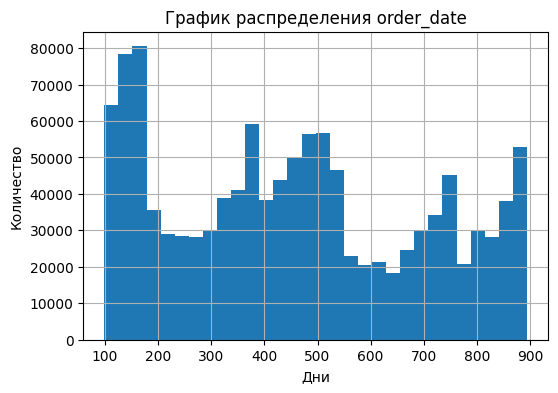

In [54]:
def_hist(df_orders, 'order_date', FIGSIZE=(6,4), BINS=30, RANGE=None, XLABEL='Дни')

Имеем распределение с несколькими модами, что может говорить об отношении группы заказов к сезонам.

##### subject_id

In [55]:
df_orders = df_orders.dropna(subset=['subject_id'])
df_orders.subject_id.unique()

array([1.000000e+00, 2.100000e+01, 8.000000e+00, 3.000000e+00,
       9.000000e+00, 3.300000e+01, 5.000000e+00, 2.000000e+00,
       1.800000e+01, 2.700000e+01, 1.000000e+01, 1.500000e+01,
       1.100000e+01, 6.000000e+00, 1.300000e+01, 1.400000e+01,
       1.200000e+01, 3.600000e+01, 1.900000e+01, 1.700000e+01,
       7.000000e+00, 2.000000e+01, 2.500000e+01, 4.000000e+00,
       2.900000e+01, 2.300000e+01, 1.600000e+01, 3.211265e+06,
       3.342337e+06, 3.605505e+06], dtype=float32)

In [56]:
print(f'Количество выбивающихся значений: {sum(df_orders.subject_id > 1000)}')

Количество выбивающихся значений: 4


In [57]:
df_orders = df_orders.loc[df_orders.subject_id < 1000]

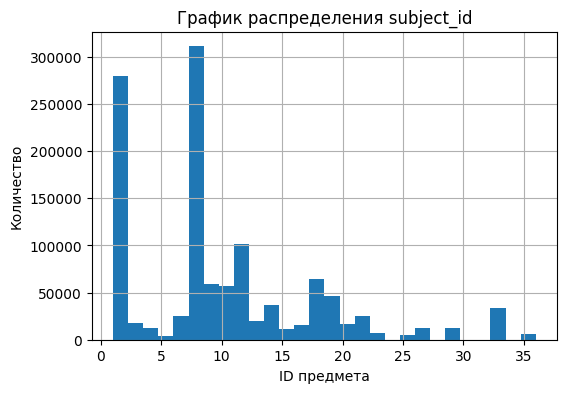

In [58]:
def_hist(df_orders, 'subject_id', FIGSIZE=(6,4),
         BINS=len(df_orders.subject_id.unique())+1, RANGE=None, XLABEL='ID предмета')

In [59]:
print('Распределение признака по классам в процентах')
(df_orders['subject_id'].value_counts(normalize=True)*100).head()

Распределение признака по классам в процентах


8.0     26.347305
2.0     14.455471
1.0      9.237130
18.0     5.442966
11.0     5.059394
Name: subject_id, dtype: float64

В столбце предметов имелось незначительное количество пропусков, а также выбивающиеся значения, которые следует удалить.

Также наблюдаем несколько предметов, у которых наибольшее количество заказов

##### lesson_price

In [60]:
display(sorted(df_orders.lesson_price.unique())[:10])
display(sorted(df_orders.lesson_price.unique())[-10:])

[0, 1, 2, 3, 4, 5, 10, 11, 12, 15]

[600000,
 700000,
 800000,
 1000000,
 7500095,
 7777777,
 10000000,
 10090000,
 20000000,
 1000000000]

Обратим внимание, в каких строках пропущены значения, видна закономерность дубликатов. Заполним нули, значениями из оригинальных заявок.

In [61]:
df_orders.loc[(df_orders['lesson_price']<25)&(df_orders['original_order_id']==0)].head()

,id,order_date,subject_id,lesson_price,lesson_duration,home_metro_id,status_id,planned_lesson_number,pupil_category_new_id,lessons_per_week,minimal_price,teacher_sex,teacher_experience_from,teacher_experience_to,lesson_place_new,pupil_knowledgelvl,teacher_age_from,teacher_age_to,chosen_teachers_only,no_teachers_available,source_id,original_order_id,is_display_to_teachers
4,2294058,468.0,8.0,0,60,122.0,16,0,NaN,0,0,0,0,0,2,0,0,0,0,0,16,0,1
5,2294059,468.0,3.0,0,60,464.0,16,0,NaN,0,0,3,0,0,0,0,0,0,0,0,16,0,1
10,2294064,468.0,33.0,0,60,NaN,16,0,NaN,0,0,3,0,0,0,0,0,0,0,0,16,0,1
26,2294080,468.0,8.0,0,60,328.0,16,10,9.0,3,0,3,5,0,1,0,16,40,0,0,23,0,1
30,2294084,468.0,18.0,0,60,NaN,16,0,NaN,0,0,0,0,0,0,0,0,0,0,0,16,0,1


In [62]:
%%time
lesson_price_fix = partial(fix, col='lesson_price')
print(lesson_price_fix.func.__doc__)
df_orders['lesson_price'] = df_orders.apply(lesson_price_fix, axis=1)

Функция для замены нулевых значений дубликатов из оригинала
CPU times: user 1min 59s, sys: 236 ms, total: 1min 59s
Wall time: 1min 59s


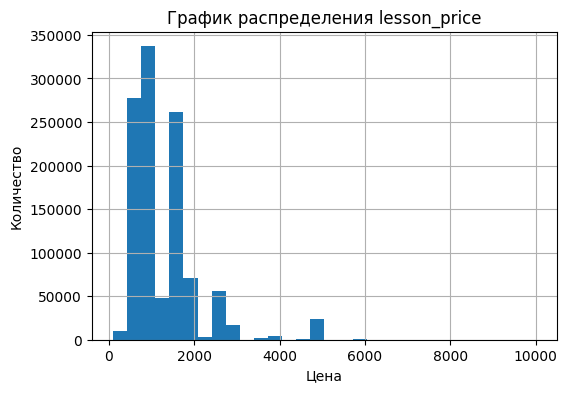

In [63]:
def_hist(df_orders, 'lesson_price',
         FIGSIZE=(6,4), BINS=30, RANGE=(100, 10001), XLABEL='Цена')

In [64]:
print(f"Медианное значение lesson_price: {df_orders.lesson_price.median()}")

Медианное значение lesson_price: 1000.0


In [65]:
df_orders = df_orders.loc[(df_orders.lesson_price >= 200) & (df_orders.lesson_price <= 10000)]

Медиана цены заказов сконцентрированна в районе 1000, график имеет распределение Пуассона.

##### lesson_duration

In [66]:
print(f'Уникальные значения столбца lesson_duration: {sorted(df_orders.lesson_duration.unique())}')

Уникальные значения столбца lesson_duration: [0, 45, 60, 90, 120, 135]


In [67]:
count_fix = len(df_orders.query("lesson_duration == 0 & original_order_id != 0"))
print(f'Всего нулей: {len(df_orders.query("lesson_duration==0"))}')
# print(f'Потенциально можно заполнить нулей: {count_fix}')

Всего нулей: 1714


In [68]:
# print(f'Количество нулевых значений{len(df_orders.query("lesson_duration == 0"))}')
df_orders = df_orders.loc[df_orders.lesson_duration != 0]

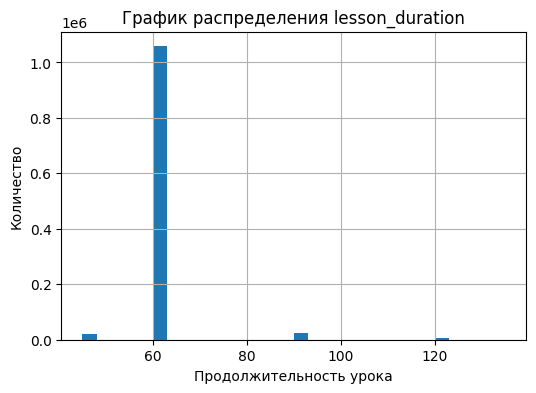

In [69]:
def_hist(df_orders, 'lesson_duration',
         FIGSIZE=(6,4), BINS=30, RANGE=None, XLABEL='Продолжительность урока')

In [70]:
print('Распределение признака по классам в процентах')
(df_orders['lesson_duration'].value_counts(normalize=True)*100).head()

Распределение признака по классам в процентах


60     95.236732
90      2.306457
45      1.791560
120     0.647965
135     0.017286
Name: lesson_duration, dtype: float64

Признак имеет слишком большой перевес одного из классов.

In [71]:
df_orders = df_orders.drop('lesson_duration', axis=1)

##### home_metro_id

In [72]:
df_orders.home_metro_id = df_orders.home_metro_id.fillna(0)
df_orders.home_metro_id = df_orders.home_metro_id.astype('int')

In [73]:
%%time
home_metro_id_change = partial(change, col='home_metro_id')
print(home_metro_id_change.func.__doc__)
df_orders['home_metro_id'] = df_orders.apply(home_metro_id_change, axis=1)

Функция для замены ненулевых значений на 1
CPU times: user 7.26 s, sys: 80 ms, total: 7.34 s
Wall time: 7.34 s


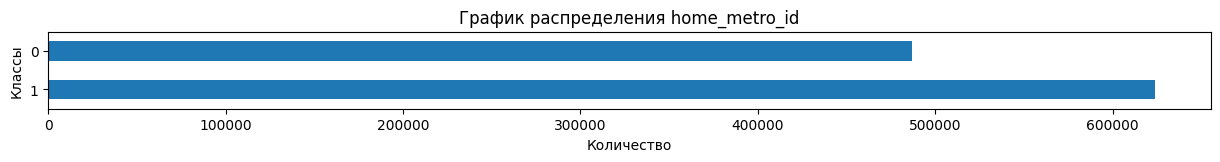

Распределение признака по классам в процентах


1    56.182093
0    43.817907
Name: home_metro_id, dtype: float64

In [74]:
def_barh(df_orders, 'home_metro_id', (15, 1))

Преобразование признака в бинарный позволяет сохранить данные и использовать его в дальнейшем

##### working_teacher_id

В последующем этот столбец можно использовать для объединения с информацией об учителях. 

###### Однако в данной вариации столбец не трогаем, поскольку он может давать утечку.

In [75]:
# display(sorted(df_orders.working_teacher_id.unique())[:10])
# sorted(df_orders.working_teacher_id.unique())[-10:]

In [76]:
# df_orders.head(3)

Из таблицы видно, что ситуация с пропусками схожая. Их можно заменить из оргиналов заявок.

In [77]:
# df_orders.working_teacher_id = df_orders.working_teacher_id.fillna(0)
# df_orders.working_teacher_id = df_orders.working_teacher_id.astype('int')

In [78]:
# count_fix = len(df_orders.query("working_teacher_id==0 & original_order_id != 0"))
# print(f'Всего нулей: {len(df_orders.query("working_teacher_id==0"))}')
# print(f'Потенциально можно заполнить нулей: {count_fix}')

In [79]:
# %%time
# working_teacher_id_fix = partial(fix, col='working_teacher_id')
# df_orders['working_teacher_id'] = df_orders.apply(working_teacher_id_fix, axis=1)

In [80]:
# df_orders = df_orders.loc[df_orders.working_teacher_id != 0]

##### planned_lesson_number

In [81]:
print(f'Уникальные значения столбца planned_lesson_number: {sorted(df_orders.planned_lesson_number.unique())}')

Уникальные значения столбца planned_lesson_number: [0, 1, 2, 7, 10]


In [82]:
count_fix = len(df_orders.query("planned_lesson_number==0 & original_order_id != 0"))
print(f'Всего нулей: {len(df_orders.query("planned_lesson_number==0"))}')
print(f'Потенциально можно заполнить нулей: {count_fix}')

Всего нулей: 100588
Потенциально можно заполнить нулей: 98420


In [83]:
%%time
planned_lesson_number_fix = partial(fix, col='planned_lesson_number')
print(planned_lesson_number_fix.func.__doc__)
df_orders['planned_lesson_number'] = df_orders.apply(planned_lesson_number_fix, axis=1)

Функция для замены нулевых значений дубликатов из оригинала
CPU times: user 1min 34s, sys: 282 ms, total: 1min 34s
Wall time: 1min 34s


In [84]:
print(f'Всего нулей: {len(df_orders.query("planned_lesson_number==0"))}')

Всего нулей: 3419


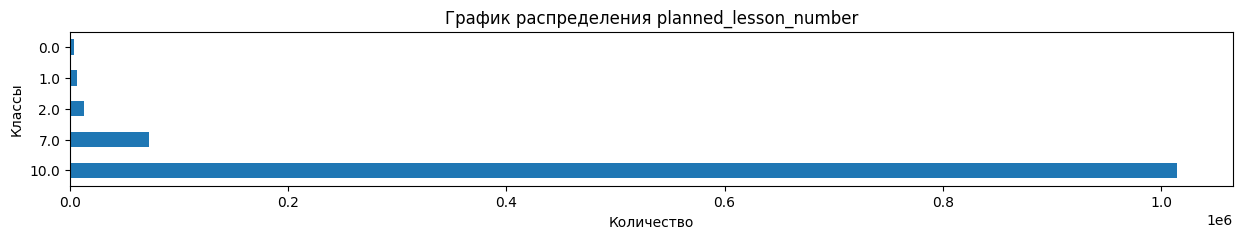

Распределение признака по классам в процентах


10.0    91.371179
7.0      6.537902
2.0      1.168084
1.0      0.615013
0.0      0.307822
Name: planned_lesson_number, dtype: float64

In [85]:
def_barh(df_orders, 'planned_lesson_number', (15, 2))

In [86]:
df_orders = df_orders.loc[df_orders.planned_lesson_number != 0]

Удалось сохранить значительное количество данных.

##### pupil_category_new_id

In [87]:
df_orders.pupil_category_new_id = df_orders.pupil_category_new_id.fillna(0)
df_orders.pupil_category_new_id = df_orders.pupil_category_new_id.astype('int')

In [88]:
count_fix = len(df_orders.query("pupil_category_new_id==0 & original_order_id != 0"))
print(f'Всего нулей: {len(df_orders.query("pupil_category_new_id==0"))}')
print(f'Потенциально можно заполнить нулей: {count_fix}')

Всего нулей: 95667
Потенциально можно заполнить нулей: 93719


In [89]:
%%time
pupil_category_new_id_fix = partial(fix, col='pupil_category_new_id')
print(pupil_category_new_id_fix.func.__doc__)
df_orders['pupil_category_new_id'] = df_orders.apply(pupil_category_new_id_fix, axis=1)

Функция для замены нулевых значений дубликатов из оригинала
CPU times: user 1min 38s, sys: 254 ms, total: 1min 39s
Wall time: 1min 39s


In [90]:
print(f'Всего нулей: {len(df_orders.query("pupil_category_new_id==0"))}')

Всего нулей: 3708


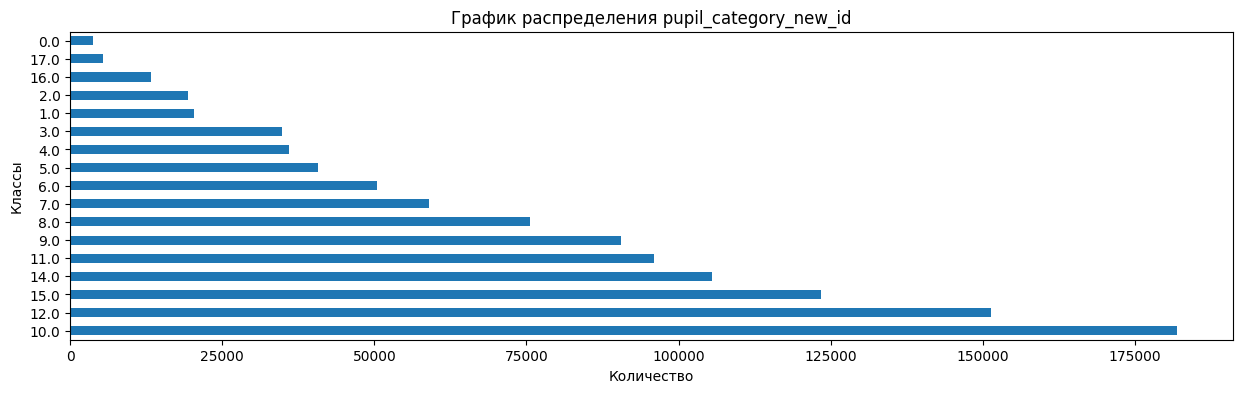

Распределение признака по классам в процентах


10.0    16.434644
12.0    13.667706
15.0    11.139549
14.0     9.525427
11.0     8.666211
Name: pupil_category_new_id, dtype: float64

In [91]:
def_barh(df_orders, 'pupil_category_new_id', (15, 4))

In [92]:
df_orders = df_orders.loc[df_orders.pupil_category_new_id != 0]

Удалось сохранить значительное количество данных.

##### lessons_per_week

In [93]:
print(f'Уникальные значения столбца lessons_per_week: {sorted(df_orders.lessons_per_week.unique())}')

Уникальные значения столбца lessons_per_week: [0, 1, 2, 3, 4, 5, 6, 7]


In [94]:
count_fix = len(df_orders.query("lessons_per_week==0 & original_order_id != 0"))
print(f'Всего нулей: {len(df_orders.query("lessons_per_week==0"))}')
print(f'Потенциально можно заполнить нулей: {count_fix}')

Всего нулей: 106357
Потенциально можно заполнить нулей: 100886


In [95]:
%%time
lessons_per_week_fix = partial(fix, col='lessons_per_week')
print(lessons_per_week_fix.func.__doc__)
df_orders['lessons_per_week'] = df_orders.apply(lessons_per_week_fix, axis=1)

Функция для замены нулевых значений дубликатов из оригинала
CPU times: user 2min 5s, sys: 298 ms, total: 2min 6s
Wall time: 2min 6s


In [96]:
print(f'Всего нулей: {len(df_orders.query("lessons_per_week==0"))}')

Всего нулей: 8191


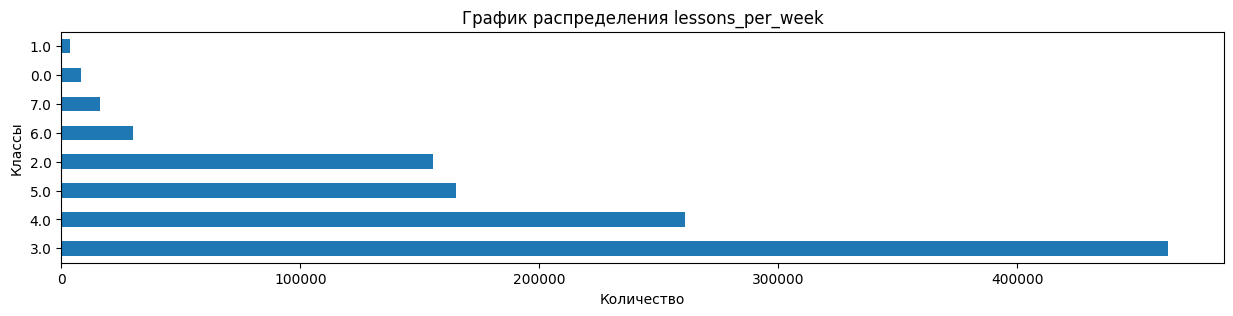

Распределение признака по классам в процентах


3.0    41.972270
4.0    23.659342
5.0    14.982679
2.0    14.093664
6.0     2.717426
Name: lessons_per_week, dtype: float64

In [97]:
def_barh(df_orders, 'lessons_per_week', (15, 3))

In [98]:
df_orders = df_orders.loc[df_orders.lessons_per_week != 0]

Удалось сохранить значительное количество данных.

##### minimal_price

In [99]:
count_fix = len(df_orders.query("minimal_price==0 & original_order_id != 0"))
print(f'Всего нулей: {len(df_orders.query("minimal_price==0"))}')
print(f'Потенциально можно заполнить нулей: {count_fix}')

Всего нулей: 804497
Потенциально можно заполнить нулей: 416882


Поскольку преимущественное количество значений - нули, поступим, как с `amount_to_pay`. Заменим заявки с наличием признака на `1`

In [100]:
%%time
minimal_price_change = partial(change, col='minimal_price')
print(minimal_price_change.func.__doc__)
df_orders['minimal_price'] = df_orders.apply(minimal_price_change, axis=1)

Функция для замены ненулевых значений на 1
CPU times: user 6.92 s, sys: 96 ms, total: 7.01 s
Wall time: 7.01 s


In [101]:
%%time
minimal_price_fix = partial(fix, col='minimal_price')
print(minimal_price_fix.func.__doc__)
df_orders['minimal_price'] = df_orders.apply(minimal_price_fix, axis=1)

Функция для замены нулевых значений дубликатов из оригинала
CPU times: user 7min 34s, sys: 391 ms, total: 7min 34s
Wall time: 7min 36s


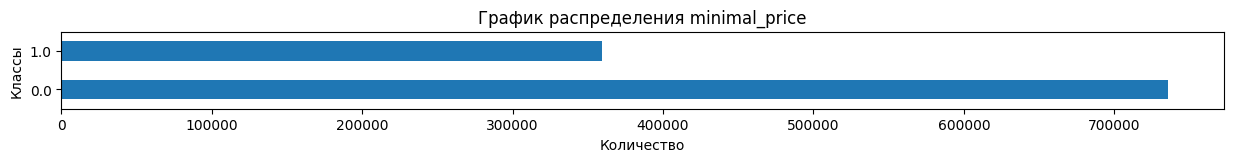

Распределение признака по классам в процентах


0.0    67.187121
1.0    32.812879
Name: minimal_price, dtype: float64

In [102]:
def_barh(df_orders, 'minimal_price', (15, 1))

##### teacher_sex

In [103]:
print(f'Уникальные значения столбца teacher_sex: {sorted(df_orders.teacher_sex.unique())}')

Уникальные значения столбца teacher_sex: [0, 1, 2, 3]


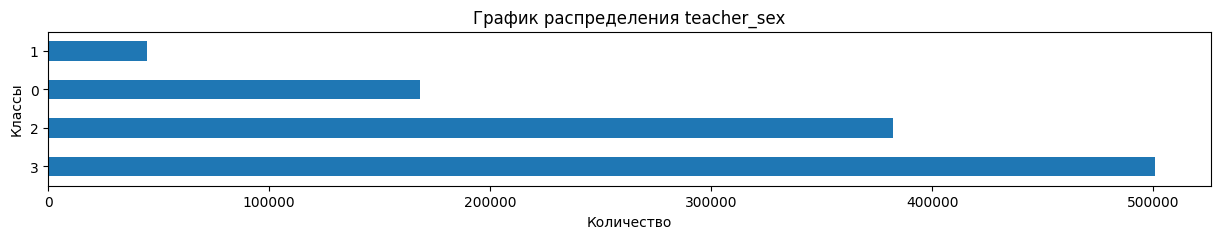

Распределение признака по классам в процентах


3    45.720885
2    34.869772
0    15.339286
1     4.070057
Name: teacher_sex, dtype: float64

In [104]:
def_barh(df_orders, 'teacher_sex', (15, 2))

Согнасно полученной информации от заказчика:
- 0 - М
- 1 - Ж
- остальные - `Not  set` (их объединим)

In [105]:
def teacher_sex_fix(row):
    '''Функция для замены значений в столбце teacher_sex'''
    if row['teacher_sex'] in [3, 2]:
        return 2
    elif row['teacher_sex']==0:
        return 0
    return 1

In [106]:
%%time
print(teacher_sex_fix.__doc__)
df_orders['teacher_sex'] = df_orders.apply(teacher_sex_fix, axis=1)

Функция для замены значений в столбце teacher_sex
CPU times: user 7.79 s, sys: 64 ms, total: 7.86 s
Wall time: 7.85 s


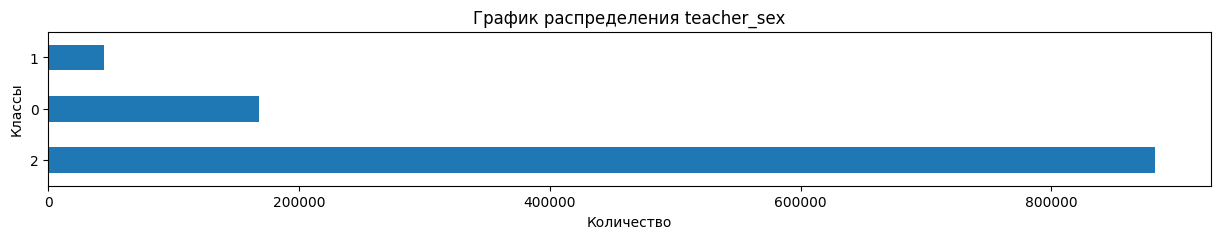

Распределение признака по классам в процентах


2    80.590657
0    15.339286
1     4.070057
Name: teacher_sex, dtype: float64

In [107]:
def_barh(df_orders, 'teacher_sex', (15, 2))

Видим явное преобладание отсутствия указания признака. Позже попробуем сделать признак бинарным

##### teacher_experience

In [108]:
df_orders['teacher_experience_from'].value_counts(normalize=True).head()*100

0     69.405235
5     16.229745
1      5.395156
10     5.304777
2      1.234629
Name: teacher_experience_from, dtype: float64

In [109]:
df_orders['teacher_experience_to'].value_counts(normalize=True).head()*100

0      98.623504
100     0.391459
50      0.272597
10      0.154100
60      0.124248
Name: teacher_experience_to, dtype: float64

In [110]:
df_orders = df_orders.drop('teacher_experience_to', axis=1)

In [111]:
%%time
teacher_experience_from_change = partial(change, col='teacher_experience_from')
print(teacher_experience_from_change.func.__doc__)
df_orders['teacher_experience_from'] = df_orders.apply(teacher_experience_from_change, axis=1)

Функция для замены ненулевых значений на 1
CPU times: user 6.99 s, sys: 112 ms, total: 7.1 s
Wall time: 7.1 s


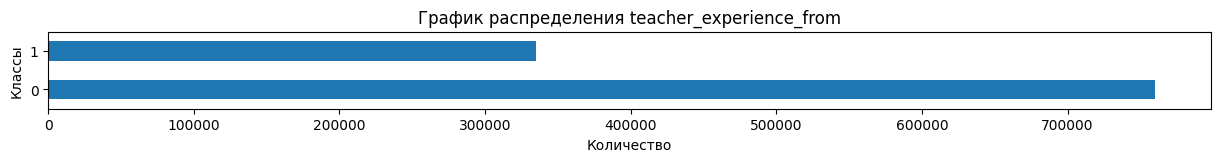

Распределение признака по классам в процентах


0    69.405235
1    30.594765
Name: teacher_experience_from, dtype: float64

In [112]:
def_barh(df_orders, 'teacher_experience_from', (15, 1))

- `teacher_experience_to` удалил признак ввиду сильного дисбаланса классов
- `teacher_experience_from` превратил признак в бинарный по наличию ненулевого опыта

##### lesson_place_new

In [113]:
print(f'Уникальные значения столбца lesson_place_new: {sorted(df_orders.lesson_place_new.unique())}')

Уникальные значения столбца lesson_place_new: [0, 1, 2, 3, 4, 5, 6, 7]


In [114]:
count_fix = len(df_orders.query("lesson_place_new==0 & original_order_id != 0"))
print(f'Всего нулей: {len(df_orders.query("lesson_place_new==0"))}')
print(f'Потенциально можно заполнить нулей: {count_fix}')

Всего нулей: 79933
Потенциально можно заполнить нулей: 79338


In [115]:
%%time
lesson_place_new_fix = partial(fix, col='lesson_place_new')
print(lesson_place_new_fix.func.__doc__)
df_orders['lesson_place_new'] = df_orders.apply(lesson_place_new_fix, axis=1)

Функция для замены нулевых значений дубликатов из оригинала
CPU times: user 1min 29s, sys: 239 ms, total: 1min 29s
Wall time: 1min 29s


In [116]:
print(f'Всего нулей: {len(df_orders.query("lesson_place_new==0"))}')

Всего нулей: 1104


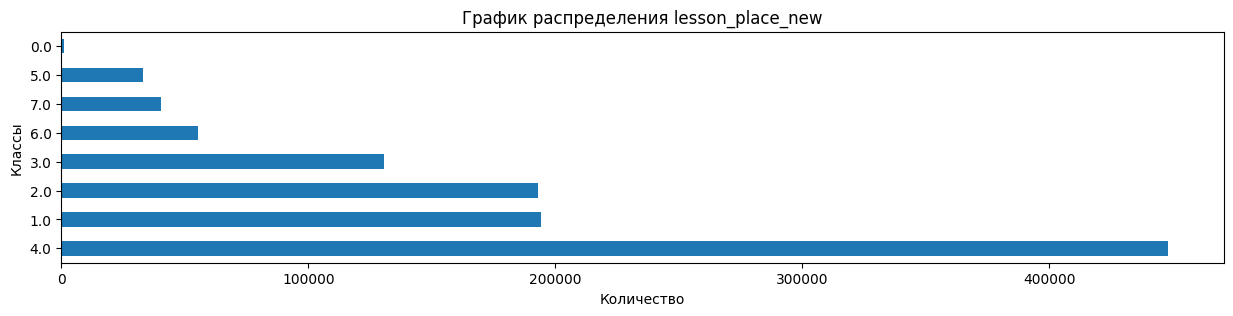

Распределение признака по классам в процентах


4.0    40.917755
1.0    17.724281
2.0    17.621304
3.0    11.917399
6.0     5.045326
Name: lesson_place_new, dtype: float64

In [117]:
def_barh(df_orders, 'lesson_place_new', (15, 3))

In [118]:
df_orders = df_orders.loc[df_orders.lesson_place_new != 0]

Удалось сохранить часть данных.

Наблюдаем преобладающий класс.

##### pupil_knowledgelvl

In [119]:
print(f'Уникальные значения столбца pupil_knowledgelvl: {sorted(df_orders.pupil_knowledgelvl.unique())}')

Уникальные значения столбца pupil_knowledgelvl: [0, 1, 2, 3, 4]


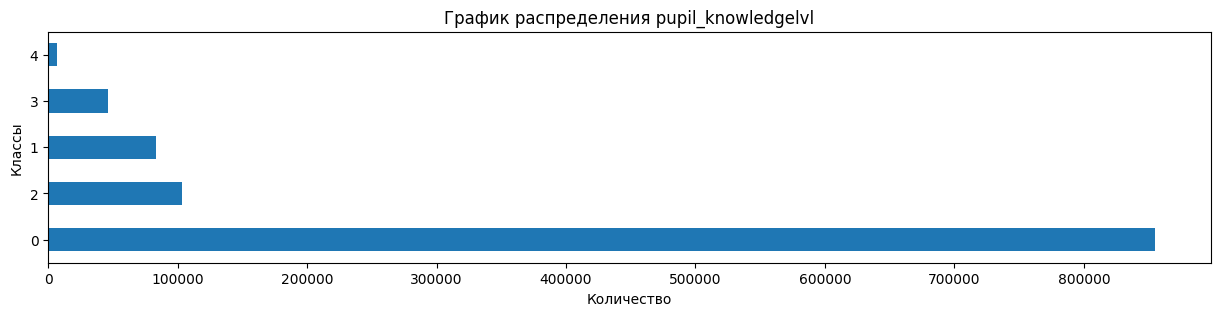

Распределение признака по классам в процентах


0    78.147486
2     9.450729
1     7.598196
3     4.203837
4     0.599752
Name: pupil_knowledgelvl, dtype: float64

In [120]:
def_barh(df_orders, 'pupil_knowledgelvl', (15, 3))

In [121]:
%%time
pupil_knowledgelvl_change = partial(change, col='pupil_knowledgelvl')
print(pupil_knowledgelvl_change.func.__doc__)
df_orders['pupil_knowledgelvl'] = df_orders.apply(pupil_knowledgelvl_change, axis=1)

Функция для замены ненулевых значений на 1
CPU times: user 6.91 s, sys: 80.1 ms, total: 6.99 s
Wall time: 6.99 s


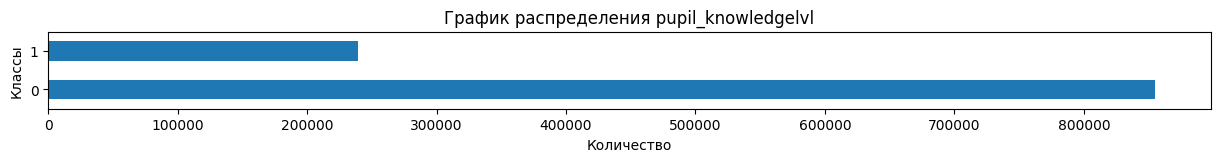

Распределение признака по классам в процентах


0    78.147486
1    21.852514
Name: pupil_knowledgelvl, dtype: float64

In [122]:
def_barh(df_orders, 'pupil_knowledgelvl', (15, 1))

##### teacher_age

In [123]:
df_orders['teacher_age_from'].value_counts(normalize=True).head()*100

0     63.789631
25    13.640858
16     5.094829
30     4.509242
18     3.739882
Name: teacher_age_from, dtype: float64

In [124]:
df_orders['teacher_age_to'].value_counts(normalize=True).head()*100

0     68.339538
50    11.948430
90     3.711096
80     3.404046
30     1.841475
Name: teacher_age_to, dtype: float64

In [125]:
%%time
teacher_age_from_change = partial(change, col='teacher_age_from')
print(teacher_age_from_change.func.__doc__)
df_orders['teacher_age_from'] = df_orders.apply(teacher_age_from_change, axis=1)

teacher_age_to_change = partial(change, col='teacher_age_to')
print(teacher_age_to_change.func.__doc__)
df_orders['teacher_age_to'] = df_orders.apply(teacher_age_to_change, axis=1)

Функция для замены ненулевых значений на 1
Функция для замены ненулевых значений на 1
CPU times: user 13.6 s, sys: 132 ms, total: 13.8 s
Wall time: 13.8 s


In [126]:
teacher_age_corr = df_orders['teacher_age_from'].corr(df_orders['teacher_age_to'])
print(f"Корреляция между столбцами teacher_age_from и teacher_age_to = {teacher_age_corr}")

Корреляция между столбцами teacher_age_from и teacher_age_to = 0.6988355217480063


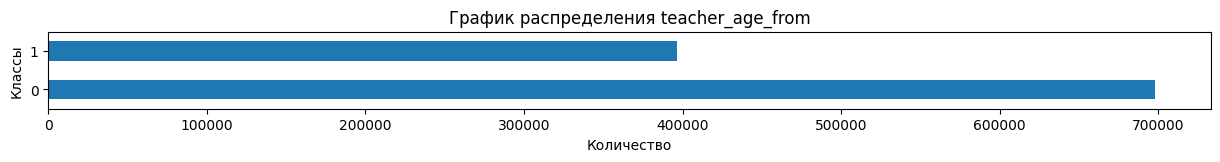

Распределение признака по классам в процентах


0    63.789631
1    36.210369
Name: teacher_age_from, dtype: float64

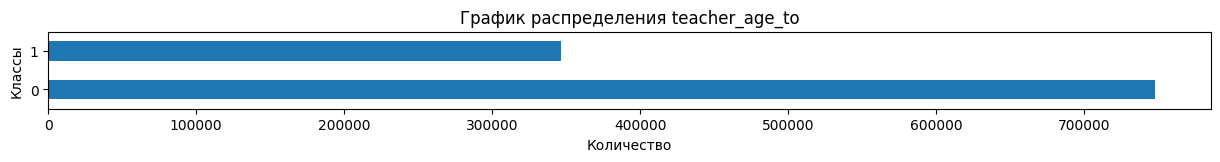

Распределение признака по классам в процентах


0    68.339538
1    31.660462
Name: teacher_age_to, dtype: float64

In [127]:
def_barh(df_orders, 'teacher_age_from', (15, 1))
def_barh(df_orders, 'teacher_age_to', (15, 1))

В будущем объединим столбецы по наличию бинарного признака.

##### chosen_teachers_only

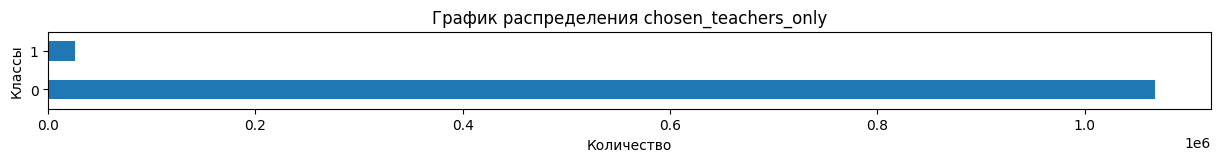

Распределение признака по классам в процентах


0    97.607116
1     2.392884
Name: chosen_teachers_only, dtype: float64

In [128]:
def_barh(df_orders, 'chosen_teachers_only', (15, 1))

In [129]:
df_orders = df_orders.drop('chosen_teachers_only', axis=1)

Слишком большой дисбаланс классов.

##### no_teachers_available

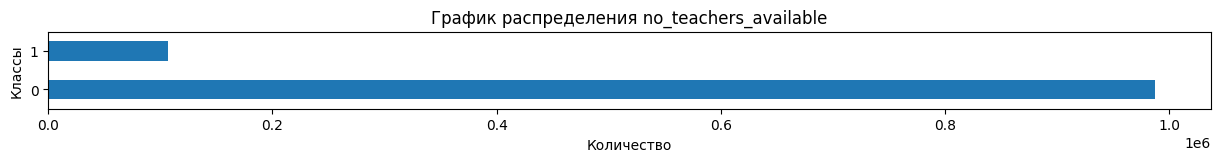

Распределение признака по классам в процентах


0    90.244598
1     9.755402
Name: no_teachers_available, dtype: float64

In [130]:
def_barh(df_orders, 'no_teachers_available', (15, 1))

In [131]:
df_orders = df_orders.drop('no_teachers_available', axis=1)

Слишком большой дисбаланс классов.

##### source_id

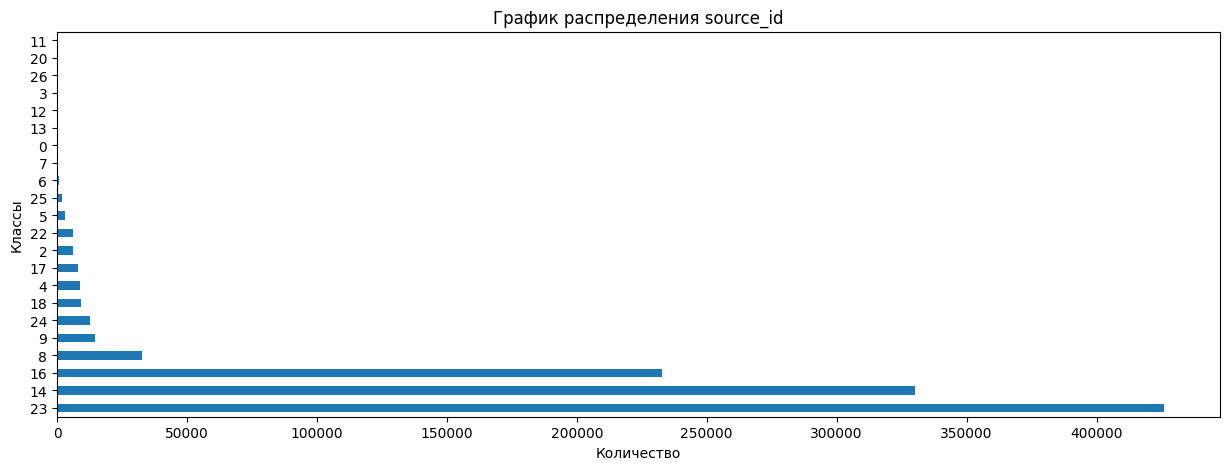

Распределение признака по классам в процентах


23    38.931596
14    30.180684
16    21.275608
8      2.984595
9      1.319856
Name: source_id, dtype: float64

In [132]:
def_barh(df_orders, 'source_id', (15, 5))

Наблюдаем в столбце большое количество редких значений. редкие значения можно в будущем попробовать объединить в отдельный класс.

##### is_display_to_teachers

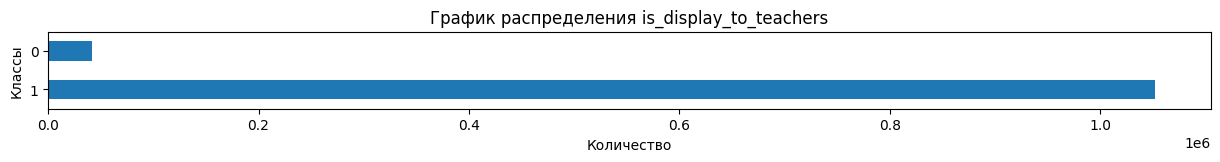

Распределение признака по классам в процентах


1    96.180523
0     3.819477
Name: is_display_to_teachers, dtype: float64

In [133]:
def_barh(df_orders, 'is_display_to_teachers', (15, 1))

In [134]:
df_orders = df_orders.drop('is_display_to_teachers', axis=1)

Слишком большой дисбаланс классов.

##### Резервный файл

In [135]:
df_orders.to_csv('/home/user/main_folder/repetit/datasets/df_orders_clear.csv', index=False)

In [136]:
# df_orders_clear = df_orders.copy()

In [137]:
del df_orders

In [138]:
df_orders_clear = pd.read_csv('/home/user/main_folder/repetit/datasets/df_orders_clear.csv')

##### status_id

Из данного столбца формируется наш целевой признак.

- 5,6,13,15 - оплачено (1)
- другое - неоплачено (0)

Поскольку у нас создаются дубликаты одной заявки, будем называть `1` все заявки, которые в итоге оплатили.

In [139]:
sorted(df_orders_clear.status_id.unique())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16]

In [140]:
paid = [5,6,13,15]

Для дальнейшего упрощения расчетов заменим необходимые статусы на 1 и 0.

Будем считать заявку оплаченной, если хотя бы один из дублей оплачен.

In [141]:
def target_main(row):
    '''Функция определения факта оплаты для каждой заявки'''
    if row['status_id'] in paid:
        return 1
    return 0

In [142]:
%%time
print(target_main.__doc__)
df_orders_clear['target_main'] = df_orders_clear.apply(target_main, axis=1)

Функция определения факта оплаты для каждой заявки
CPU times: user 7.15 s, sys: 72 ms, total: 7.22 s
Wall time: 7.22 s


In [ ]:
df_orders_clear.head(3)

In [ ]:
def target(row):
    '''Функция подсчета количества дублей оригинальной заявки \
и выявление факта оплаты оригинальной заявки из дублей'''
    if row['original_order_id'] == 0:
        orig_id = row['id']
        
        id_list = [orig_id]
        id_list.extend(df_orders_clear.loc[df_orders_clear.original_order_id == orig_id, 'id'].values)
        
        target_list = []
        for i in id_list:
            target_list.append(df_orders_clear.loc[df_orders_clear.id==i, 'target_main'].values[0])
        return [len(target_list), max(target_list)]
    return [-1, -1]

In [ ]:
%%time
print(target.__doc__)
df_orders_clear[['count_target', 'target']] = \
df_orders_clear.apply(lambda row: pd.Series(target(row)), axis=1)

In [ ]:
df_orders_clear.head(3)

In [ ]:
def target_fix_final(row):
    '''Функция заполнения целевого признака дубликатов из оригинальных заявок '''
    if row['target'] == -1:
        orig_id = row['original_order_id']
        new_count_target = df_orders_clear.loc[df_orders_clear.id == orig_id, 'count_target']
        new_target = df_orders_clear.loc[df_orders_clear.id == orig_id, 'target']
        
        try:
            return [new_count_target.values[0], new_target.values[0]]
        except:
            pass
    return [row['count_target'], row['target']]

In [ ]:
%%time
print(target_fix_final.__doc__)
df_orders_clear[['count_target_fix', 'target_fix']] = \
df_orders_clear.apply(lambda row: pd.Series(target_fix_final(row)), axis=1)

In [ ]:
df_orders_clear.head(3)

In [ ]:
df_orders_clear = df_orders_clear.drop('status_id', axis=1)

###### Оценка дисбаланса целевого признака

In [ ]:
df_orders_clear.target_fix.value_counts().plot.barh(figsize=(15, 2))
plt.title('График распределения оплаченых и неоплаченых заявок')
plt.ylabel(' ')
plt.xlabel('Количество')
plt.show()

print('Распределение целевого признака по классам в процентах')
df_orders_clear['target_fix'].value_counts(normalize=True)*100

In [ ]:
df_orders_clear = df_orders_clear.loc[df_orders_clear.target_fix != -1]

In [ ]:
df_orders_clear = df_orders_clear.drop(['target_main', 'count_target', 'target'], axis=1)

Обнаружен дисбаланс классов, что характерно для данной задачи обработки заявок.

Столбец `status_id` оставим и оценим на мультиколлинеарность, поскольку этап заявки может влиять на итоговое решение оплаты.

##### Вывод по итогу исследования данных в таблице orders

- Обработал пропуски
- Удалил дубликаты
- Изучил распределения данных


- Создал синтетические признаки
- Подготовил целевой признак для последующего обучения моделей

Распределение целевого признака обладает частичным дисбалансом. Обработку будем проводить в случае необходимости.

##### Резервный файл orders

In [ ]:
df_orders_clear.to_csv('/home/user/main_folder/repetit/datasets/df_orders_final.csv', index=False)

In [ ]:
# df_orders_final = df_orders_clear.copy()

In [ ]:
del df_orders_clear

In [ ]:
df_orders_final = pd.read_csv('/home/user/main_folder/repetit/datasets/df_orders_final.csv')

#### Информация об учителях

# Поскольку working_teacher_id может давать утечку, ввиду неивестности в момент получения информации о заказе, дальнейшую обработку оставим до лучших времён

In [ ]:
display(df_teachers_info.head(2).style.set_caption('Информация об учителях'))
print(f"Количество явных дубликатов: {df_teachers_info.duplicated().sum()}\n")

In [ ]:
df_teachers_info.info()

In [ ]:
drop_cols = df_teachers_info.isna().sum().to_frame(name="nans").query("nans > 200000")["nans"]
display(drop_cols)

df_teachers_info = df_teachers_info.drop(drop_cols.index, axis=1)
del drop_cols

##### Дублируемые столбцы

In [ ]:
def unique_val(col):
    '''Функция для проверки идентичности столбцов'''
    res_1 = df_teachers_info[col].equals(df_teachers_info[col+'.1'])
    res_2 = df_teachers_info[col+'.1'].equals(df_teachers_info[col+'.2'])
    return res_1==res_2

In [ ]:
cols = ['lesson_duration', 'lesson_cost', 'status_id', 'status_display', 'russian_level_id',
        'home_country_id', 'is_confirmed', 'information']

In [ ]:
%%time
print(unique_val.__doc__)

answers = []
for col in cols:
    answers.append(unique_val(col))

if False in answers == True:
    print('В списке есть отличающиеся столбцы')
else:
    print('Столбцы идентичны')

In [ ]:
drop_cols = [x+'.1' for x in cols] + [x+'.2' for x in cols]
drop_cols

In [ ]:
df_teachers_info = df_teachers_info.drop(drop_cols, axis=1)
del drop_cols

##### date_update

In [ ]:
date_update = (today - pd.to_datetime(df_teachers_info['date_update'], errors='coerce')).dt.days
df_teachers_info['date_update'] = date_update
del date_update

In [ ]:
def_hist(df_teachers_info, 'date_update', FIGSIZE=(6,4), BINS=30, RANGE=None, XLABEL='Дни')

In [ ]:
df_teachers_info.date_update.value_counts()

In [ ]:
df_teachers_info = df_teachers_info.loc[(df_teachers_info.date_update <= 600)]

Поскольку у нас ограниченный формат данных за определенне сроки, наблюдаем выбивающиеся значения.

Вряд ли признак будет иметь достаточно полезный вес для модели, однако, изучим подробнее при проверке.

##### reg_date

In [ ]:
reg_date = round((today - pd.to_datetime(df_teachers_info['reg_date'], errors='coerce')).dt.days / 365, 1)
df_teachers_info['reg_date'] = reg_date
del reg_date

In [ ]:
def_hist(df_teachers_info, 'reg_date', FIGSIZE=(6,4), BINS=30, RANGE=None, XLABEL='Года')

Линейная тенденция увеличения количества регистраций с течением времени

##### birth_date

In [ ]:
birth_date = round((today - pd.to_datetime(df_teachers_info['birth_date'], errors='coerce')).dt.days / 365, 1)

df_teachers_info['birth_date'] = birth_date
del birth_date

In [ ]:
def_hist(df_teachers_info, 'birth_date', FIGSIZE=(6,4), BINS=30, RANGE=None, XLABEL='Года')

In [ ]:
df_teachers_info = df_teachers_info.loc[(df_teachers_info.birth_date <= 80)
                                        & ((df_teachers_info.birth_date > 18))]

Наблюдаем выбивающиеся значения, оставим наиболее релевантные.

##### teaching_start_date

In [ ]:
teaching_start_date = round((today - pd.to_datetime(df_teachers_info['teaching_start_date'],
                                                    errors='coerce')).dt.days / 365, 1)

df_teachers_info['teaching_start_date'] = teaching_start_date
del teaching_start_date

In [ ]:
def_hist(df_teachers_info, 'teaching_start_date', FIGSIZE=(6,4), BINS=30, RANGE=None, XLABEL='Года')

In [ ]:
df_teachers_info = df_teachers_info.loc[df_teachers_info.teaching_start_date <= 60]

Ситуация аналогичная, удалим выбивающиеся значения

##### is_email_confirmed

In [ ]:
def_barh(df_teachers_info, 'is_email_confirmed', (15, 1))

In [ ]:
df_teachers_info = df_teachers_info.drop('is_email_confirmed', axis=1)

Сильный дисбаланс классов, удалим признак.

##### is_home_lessons

In [ ]:
def_barh(df_teachers_info, 'is_home_lessons', (15, 1))

Используем признак в качестве бинарного для обучения.

##### is_external_lessons

In [ ]:
def_barh(df_teachers_info, 'is_external_lessons', (15, 1))

Используем признак в качестве бинарного для обучения.

##### lesson_duration

In [ ]:
print(f'Уникальные значения столбца lesson_duration: {sorted(df_teachers_info.lesson_duration.unique())}')

In [ ]:
df_teachers_info = df_teachers_info.loc[(df_teachers_info.lesson_duration>=25) &
                                        (df_teachers_info.lesson_duration<=240)]

In [ ]:
def_hist(df_teachers_info, 'lesson_duration', FIGSIZE=(6,4), BINS=30, RANGE=None, XLABEL='Длительность')

In [ ]:
print('Распределение признака по классам в процентах')
(df_teachers_info['lesson_duration'].value_counts(normalize=True)*100).head()

Признак имеет слишком большой перевес одного из классов.

In [ ]:
df_teachers_info = df_teachers_info.drop('lesson_duration', axis=1)

##### lesson_cost

In [ ]:
def_hist(df_teachers_info, 'lesson_cost', FIGSIZE=(6,4), BINS=30, RANGE=(100, 10001), XLABEL='Цена')

In [ ]:
df_teachers_info = df_teachers_info.loc[(df_teachers_info.lesson_cost >= 200) &
                                        (df_teachers_info.lesson_cost <= 10000)]

In [ ]:
print(f"Медианное значение lesson_price: {df_teachers_info.lesson_cost.median()}")

Признак имеет распределение Пуассона с медианой равной 800

##### status_id

In [ ]:
def_barh(df_teachers_info, 'status_id', (15, 2))

Признак без проблем

##### status_display

In [ ]:
def_barh(df_teachers_info, 'status_display', (15, 1))

Используем признак в качестве бинарного для обучения.

##### russian_level_id

In [ ]:
def_barh(df_teachers_info, 'russian_level_id', (15, 2))

In [ ]:
df_teachers_info = df_teachers_info.drop('russian_level_id', axis=1)

Сильный дисбаланс классов

##### home_country_id

In [ ]:
print('Распределение признака по классам в процентах')
(df_teachers_info['home_country_id'].value_counts(normalize=True)*100).head()

In [ ]:
df_teachers_info = df_teachers_info.drop('home_country_id', axis=1)

Сильный дисбаланс классов

##### information

В столбце присутствует большое количество пропусков. Cоpдадим из столбца бинарный признак/

In [ ]:
# type(df_teachers_info.information[1])==str

In [ ]:
%%time
information_change_text = partial(change_text, col='information')
print(information_change_text.func.__doc__)
df_teachers_info['information'] = df_teachers_info.apply(information_change_text, axis=1)

In [ ]:
def_barh(df_teachers_info, 'information', (15, 1))

Используем признак в качестве бинарного для обучения.

##### is_confirmed

In [ ]:
def_barh(df_teachers_info, 'is_confirmed', (15, 1))

Сильный дисбаланс классов, удалим признак.

In [ ]:
df_teachers_info = df_teachers_info.drop('is_confirmed', axis=1)

##### photo_path

In [ ]:
%%time
photo_path_change_text = partial(change_text, col='photo_path')
print(photo_path_change_text.func.__doc__)
df_teachers_info['photo_path'] = df_teachers_info.apply(photo_path_change_text, axis=1)

In [ ]:
def_barh(df_teachers_info, 'photo_path', (15, 1))

Используем признак в качестве бинарного.

##### is_display

In [ ]:
def_barh(df_teachers_info, 'is_display', (15, 1))

Используем признак в качестве бинарного.

##### rating_id

In [ ]:
def_barh(df_teachers_info, 'rating_id', (15, 5))

Имеются преобладающие классы, поскольку их несколько, оставим признак.

##### rating

In [ ]:
def_barh(df_teachers_info, 'rating', (15, 5))

Имеются преобладающие классы, поскольку их несколько, оставим признак.

Значение `-100500` скорее не является выбросом, оставим его.

##### rules_confirmed_date

In [ ]:
rules_confirmed_date = round((today - pd.to_datetime(df_teachers_info['rules_confirmed_date'],
                                                     errors='coerce')).dt.days / 365, 1)

df_teachers_info['rules_confirmed_date'] = rules_confirmed_date
del rules_confirmed_date

In [ ]:
def_hist(df_teachers_info, 'rules_confirmed_date', FIGSIZE=(6,4), BINS=30, RANGE=None, XLABEL='Года')

In [ ]:
(df_teachers_info['rules_confirmed_date'].value_counts(normalize=True)*100).head()

Имеем сильную моду, однако, пока оставим признак.

##### last_visited

In [ ]:
last_visited = round((today - pd.to_datetime(df_teachers_info['last_visited'],
                                                     errors='coerce')).dt.days / 365, 1)

df_teachers_info['last_visited'] = last_visited
df_teachers_info['last_visited'] = df_teachers_info['last_visited'].fillna(-1)
del last_visited

In [ ]:
def_hist(df_teachers_info, 'last_visited', FIGSIZE=(6,4), BINS=30, RANGE=None, XLABEL='Года')

In [ ]:
(df_teachers_info['last_visited'].value_counts(normalize=True)*100).head()

Имеет значительное количество пропусков, заполним их заглушками.

Наблюдаем естественную картину активностей. Большее количество учителей заходило недавно.

##### is_cell_phone_confirmed

In [ ]:
def_barh(df_teachers_info, 'is_cell_phone_confirmed', (15, 1))

Сильный дисбаланс классов, удалим признак.

In [ ]:
df_teachers_info = df_teachers_info.drop('is_cell_phone_confirmed', axis=1)

##### effective_rating

In [ ]:
display(sorted(df_teachers_info.effective_rating.unique())[:5]) # 5 минимальных уникальных значений
display(sorted(df_teachers_info.effective_rating.unique())[-5:]) # 5 максимальных уникальных значений
df_teachers_info.effective_rating.value_counts().head()

In [ ]:
%%time
effective_rating_change = partial(change, col='effective_rating')
print(effective_rating_change.func.__doc__)
df_teachers_info['effective_rating'] = df_teachers_info.apply(effective_rating_change, axis=1)

In [ ]:
def_barh(df_teachers_info, 'effective_rating', (15, 1))

Сохранил признак, используею его, как бинарный.

##### area_id

In [ ]:
print('Распределение признака по классам в процентах')
(df_teachers_info['area_id'].value_counts(normalize=True)*100).head()

In [ ]:
len(df_teachers_info['area_id'].value_counts())

In [ ]:
def area_id(row):
    '''Функция объединения выбранных классов в общий'''
    if row.area_id == 1:
        return 1
    if row.area_id == 2:
        return 2
    return 3

In [ ]:
%%time
print(area_id.__doc__)
df_teachers_info['area_id'] = df_teachers_info.apply(area_id, axis=1)

Поскольку у признака было много слабых классов, объединим их в один "другое"

##### sex

In [ ]:
def_barh(df_teachers_info, 'sex', (15, 1))

In [ ]:
df_teachers_info = df_teachers_info.loc[df_teachers_info.sex != 0]

В данном случае нулевой класс - выбивающее значние, ввиду его слабости.

##### amount_to_pay

In [ ]:
def_barh(df_teachers_info, 'amount_to_pay', (15, 1))

In [ ]:
df_teachers_info = df_teachers_info.drop('amount_to_pay', axis=1)

Сильный дисбаланс классов

##### is_remote_lessons

In [ ]:
def_barh(df_teachers_info, 'is_remote_lessons', (15, 1))

Сбалансированный признак

##### show_on_map

In [ ]:
def_barh(df_teachers_info, 'show_on_map', (15, 1))

Сбалансированный признак

##### send_mailing

In [ ]:
def_barh(df_teachers_info, 'send_mailing', (15, 1))

Сбалансированный признак

##### send_suitable_orders

In [ ]:
def_barh(df_teachers_info, 'send_suitable_orders', (15, 1))

In [ ]:
df_teachers_info = df_teachers_info.drop('send_suitable_orders', axis=1)

Сильный дисбаланс классов

##### rating_for_users

In [ ]:
def_hist(df_teachers_info, 'rating_for_users', FIGSIZE=(6,4), BINS=30, RANGE=None, XLABEL='Рейтинг')

In [ ]:
df_teachers_info = df_teachers_info.loc[df_teachers_info.rating_for_users <= 10_000]

Удалим сильно выбивающиеся значения

##### rating_for_admin

In [ ]:
def_hist(df_teachers_info, 'rating_for_admin', FIGSIZE=(6,4), BINS=30, RANGE=None, XLABEL='Рейтинг')

In [ ]:
df_teachers_info = df_teachers_info.loc[df_teachers_info.rating_for_admin <= 9_000]

Удалим сильно выбивающиеся значения.

Корреляции оценим позднее.

##### is_edited

In [ ]:
def_barh(df_teachers_info, 'is_edited', (15, 1))

Сбалансированный признак

##### orders_allowed

In [ ]:
def_barh(df_teachers_info, 'orders_allowed', (15, 1))

In [ ]:
df_teachers_info = df_teachers_info.drop('orders_allowed', axis=1)

Сильный дисбаланс классов

##### display_days

In [ ]:
def_hist(df_teachers_info, 'display_days', FIGSIZE=(6,4), BINS=30, RANGE=None, XLABEL='Дни')

In [ ]:
(df_teachers_info['display_days'].value_counts(normalize=True)*100).head()

Признак имеет выбивающиеся значения, однако, может быть полезен.

##### verification_status_id

In [ ]:
def_barh(df_teachers_info, 'verification_status_id', (15, 2))

Присутствуют доминантные классы, оставим признак.

##### star_rating

In [ ]:
def_hist(df_teachers_info, 'star_rating', FIGSIZE=(6,4), BINS=30, RANGE=None, XLABEL='Рейтинг')

In [ ]:
print(f'Мода признака star_rating {df_teachers_info.star_rating.mode().values[0]}')

Интересное значение моды, позднее оценим признак на корреляцию с целевым признаком, однако, вряд ли признак будет полезен.

##### rating_for_users_yesterday

In [ ]:
def_hist(df_teachers_info, 'rating_for_users_yesterday', FIGSIZE=(6,4), BINS=30, RANGE=None, XLABEL='Рейтинг')

Признак будет сильно коррелировать с `rating_for_users`

##### review_num

In [ ]:
print('Распределение признака по классам в процентах')
(df_teachers_info['review_num'].value_counts(normalize=True)*100).head()

In [ ]:
%%time
review_num_change = partial(change, col='review_num')
print(review_num_change.func.__doc__)
df_teachers_info['review_num'] = df_teachers_info.apply(review_num_change, axis=1)

In [ ]:
def_barh(df_teachers_info, 'review_num', (15, 1))

Сбалансированный бинарный признак.

##### relevance_date

In [ ]:
relevance_date = round((today - pd.to_datetime(df_teachers_info['relevance_date'],
                                                     errors='coerce')).dt.days / 365, 1)

df_teachers_info['relevance_date'] = relevance_date
del relevance_date

In [ ]:
def_hist(df_teachers_info, 'relevance_date', FIGSIZE=(6,4), BINS=30, RANGE=None, XLABEL='Дни')

In [ ]:
(df_teachers_info['relevance_date'].value_counts(normalize=True)*100).head()

Признак имеет выбивающееся значение, однако, может быть полезен.

##### is_display_at_partners

In [ ]:
def_barh(df_teachers_info, 'is_display_at_partners', (15, 1))

Бинарный признак с дисбалансом, однако, может быть полезен.

##### Вывод по итогу исследования данных в таблице teachers_info

- Обработал пропуски
- Изучил распределения данных

Удаление некоторых преподавателей приведёт к частичной потере целевого признаказ, однако, сохранена большая часть данных.

---

###### Потенциальные улучшения

- Обработка текстовых призаков
- поиск и разработка синтетических признаков

---

После проверки на мультиколлинеарность обработаем бинарные столбцы

##### Резервный файл teachers_info

In [ ]:
df_teachers_info.to_csv('/home/user/main_folder/repetit/datasets/df_teachers_info_clear.csv', index=False)

In [ ]:
df_teachers_info_clear = df_teachers_info.copy()

In [ ]:
# del df_teachers_info

In [ ]:
df_teachers_info_clear = pd.read_csv('/home/user/main_folder/repetit/datasets/df_teachers_info_clear.csv')

##### Резервный файл teachers_info

In [ ]:
df_teachers_info_clear.to_csv('/home/user/main_folder/repetit/datasets/df_teachers_info_final.csv', index=False)

In [ ]:
# df_teachers_info_final = df_teachers_info_clear.copy()

In [ ]:
del df_teachers_info_clear

In [ ]:
# df_teachers_info_final = pd.read_csv('/home/user/main_folder/repetit/datasets/df_teachers_info_final.csv')

#### Информация о подходящих учителях suitable_teachers

In [ ]:
display(df_suitable_teachers.head(2).style.set_caption('Информация о подходящих учителях'))
print(f"Количество явных дубликатов: {df_suitable_teachers.duplicated().sum()}\n")

In [ ]:
df_suitable_teachers.info()

In [ ]:
round(df_suitable_teachers.isna().sum() / len(df_suitable_teachers) * 100, 2)

##### contact_result

In [ ]:
df_suitable_teachers.contact_result.value_counts().head(20)

Обработакм признак вручную.

- Не дозвонились - 0
- Репетитор согласился (с/без условий) - 1
- Репетитор положил трубку - 2
- Остальное - 3

In [ ]:
df_suitable_teachers['contact_result'] = df_suitable_teachers['contact_result'].astype('object')

In [ ]:
def contact_result(row):
    '''Функция объединения выбранных классов в общий и замены некоторых классов на численные'''
    try:
        if 'Не дозвонились' in row.contact_result:
            return 0
        elif 'Репетитор согласился' in row.contact_result:
            return 1
        elif 'положил трубку' in row.contact_result:
            return 2
        else:
            return 3
    except:
        return 4

In [ ]:
%%time
print(contact_result.__doc__)
df_suitable_teachers['contact_result'] = df_suitable_teachers.apply(contact_result, axis=1)

In [ ]:
def_barh(df_suitable_teachers, 'contact_result', (15, 2))

Большая часть звонков потеряла сымсл после добработки и тк не заполнены данные. Изучим подробнее при проверке на мультиколлинеарность.

##### enable_auto_assign

In [ ]:
def_barh(df_suitable_teachers, 'enable_auto_assign', (15, 1))

Наблюдаем дисбаланс классов, однако, пока оставим признак.

##### enable_assign

In [ ]:
def_barh(df_suitable_teachers, 'enable_assign', (15, 1))

Слишком большой дисбаланс классов, объединим с `enable_auto_assign`.

In [ ]:
df_suitable_teachers.enable_assign.corr(df_suitable_teachers.enable_auto_assign)

In [ ]:
binar_cols = ['enable_assign', 'enable_auto_assign']

In [ ]:
%%time
df_suitable_teachers['enable_assign_sum'] = (df_suitable_teachers['enable_assign'] 
                                             + df_suitable_teachers['enable_auto_assign'])

In [ ]:
df_suitable_teachers = df_suitable_teachers.drop(['enable_assign', 'enable_auto_assign'], axis=1)

Слишком большой дисбаланс классов

In [ ]:
df_suitable_teachers.head()

##### Резервный файл df_suitable_teachers

In [ ]:
df_suitable_teachers.to_csv('/home/user/main_folder/repetit/datasets/df_suitable_teachers_final.csv', index=False)

In [ ]:
# df_suitable_teachers_final = df_suitable_teachers.copy()

In [ ]:
del df_suitable_teachers

In [ ]:
df_suitable_teachers_final = pd.read_csv('/home/user/main_folder/repetit/datasets/df_suitable_teachers_final.csv')

##### Вывод по итогу исследования данных в таблице df_suitable_teachers

В таблице осталось 2 признака, однако, она является связующей между двумя другими таблицами.

### Объединение таблиц

Итог объединения таблиц ниже. Требует много памяти.

In [ ]:
df_orders_final = pd.read_csv('/home/user/main_folder/repetit/datasets/df_orders_final.csv')

In [ ]:
df_teachers_info_final = pd.read_csv('/home/user/main_folder/repetit/datasets/df_teachers_info_final.csv')

In [ ]:
df_suitable_teachers_final = pd.read_csv('/home/user/main_folder/repetit/datasets/df_suitable_teachers_final.csv')

In [ ]:
display(df_orders_final.head(3))
display(df_teachers_info_final.head(3))
df_suitable_teachers_final.head(3)

Для облегчения расчетов подготовим для оставшихся признаков подходящие типы данных соразмерно затрачиваемой памяти.

##### Обработка бинарных столбцов df_orders_final

In [ ]:
binar_cols = ['minimal_price', 'teacher_experience_from',
              'pupil_knowledgelvl', 'teacher_age_from', 'teacher_age_to', 'home_metro_id']

In [ ]:
%%time
df_orders_final['orders_binar_total'] = (df_orders_final['minimal_price'] +
                                         df_orders_final['teacher_experience_from'] +
                                         df_orders_final['pupil_knowledgelvl'] +
                                         df_orders_final['teacher_age_from'] +
                                         df_orders_final['teacher_age_to'] +
                                         df_orders_final['home_metro_id']
                                        )

In [ ]:
df_orders_final = df_orders_final.drop(binar_cols, axis=1)

##### Обработка бинарных столбцов df_teachers_info_final

In [ ]:
binar_cols = ['is_home_lessons', 'is_external_lessons',
              'status_display', 'is_display', 'effective_rating', 'is_remote_lessons',
              'show_on_map', 'send_mailing', 'is_edited',
              'is_display_at_partners']

In [ ]:
%%time
df_teachers_info_final['binar_teachers_info'] = (df_teachers_info_final['is_home_lessons'] +
                                                 df_teachers_info_final['is_external_lessons'] +
                                                 df_teachers_info_final['status_display'] +
                                                 df_teachers_info_final['is_display'] +
                                                 df_teachers_info_final['effective_rating'] +
                                                 df_teachers_info_final['is_remote_lessons'] +
                                                 df_teachers_info_final['show_on_map'] +
                                                 df_teachers_info_final['send_mailing'] +
                                                 df_teachers_info_final['is_edited'] +
                                                 df_teachers_info_final['is_display_at_partners']
                                                )

In [ ]:
df_teachers_info_final = df_teachers_info_final.drop(binar_cols, axis=1)

##### Обработка текстовых бинарных столбцов df_teachers_info_final

In [ ]:
binar_cols = ['information', 'photo_path']

In [ ]:
%%time
df_teachers_info_final['binar_teachers_info_text'] = (df_teachers_info_final['information'] +
                                                      df_teachers_info_final['photo_path'])

In [ ]:
df_teachers_info_final = df_teachers_info_final.drop(binar_cols, axis=1)

##### Изменение типов данных

In [ ]:
INT32_COLS = ['id', 'lesson_price', 'original_order_id']
INT16_COLS = list(set(df_orders_final.columns.values) - set(INT32_COLS))


df_orders_final[INT32_COLS] = df_orders_final[INT32_COLS].astype('int32')
df_orders_final[INT16_COLS] = df_orders_final[INT16_COLS].astype('int16')

In [ ]:
FLOAT_COLS = ['rating_for_users', 'rating_for_admin', 'star_rating', 'rating_for_users_yesterday']

INT32_COLS = ['id', 'user_id', 'lesson_cost', 'rating_id', 'rating']

INT16_COLS = list(set(df_teachers_info_final.columns.values) - set(FLOAT_COLS) - set(INT32_COLS))


df_teachers_info_final[INT32_COLS] = df_teachers_info_final[INT32_COLS].astype('int32')
df_teachers_info_final[INT16_COLS] = df_teachers_info_final[INT16_COLS].astype('int16')
df_teachers_info_final[FLOAT_COLS] = df_teachers_info_final[FLOAT_COLS].astype('float16')

In [ ]:
INT32_COLS = ['teacher_id', 'order_id']
INT16_COLS = ['contact_result', 'enable_assign_sum']


df_suitable_teachers_final[INT32_COLS] = df_suitable_teachers_final[INT32_COLS].astype('int32')
df_suitable_teachers_final[INT16_COLS] = df_suitable_teachers_final[INT16_COLS].astype('int16')

##### Объединение

In [ ]:
%%time
df_merged = df_suitable_teachers_final.merge(df_teachers_info_final,
                                             left_on='teacher_id', right_on='id',
                                             how='left')

In [ ]:
print('Пропуски в полученной таблице')
display(round(df_merged.isna().sum() / len(df_merged) * 100, 2))
df_merged.head(3)

In [ ]:
%%time
df_merged = df_merged.dropna()

In [ ]:
# FLOAT_COLS = ['rating_for_users', 'rating_for_admin', 'star_rating', 'rating_for_users_yesterday']

# INT32_COLS = ['lesson_cost', 'rating_id', 'rating']

# INT16_COLS = list(set(df_merged.columns.values) - set(FLOAT_COLS) - set(INT32_COLS))



# df_merged[INT32_COLS] = df_merged[INT32_COLS].astype('int32')
# df_merged[INT16_COLS] = df_merged[INT16_COLS].astype('int16')
# df_merged[FLOAT_COLS] = df_merged[FLOAT_COLS].astype('float16')

In [ ]:
%%time
df_merged = df_orders_final.merge(df_merged,
                                  left_on='id', right_on='order_id',
                                  how='left')

In [ ]:
print('Пропуски в полученной таблице')
display(round(df_merged.isna().sum() / len(df_merged) * 100, 2))
df_merged.head(3)

In [ ]:
%%time
df_merged = df_merged.dropna()

In [ ]:
df_merged.shape

In [ ]:
drop_cols = ['id_x', 'teacher_id', 'order_id', 'id_y', 'user_id', 'teacher_sex', 'original_order_id']

In [ ]:
df_merged = df_merged.drop(drop_cols, axis=1)

In [ ]:
FLOAT_COLS = ['rating_for_users', 'rating_for_admin', 'star_rating', 'rating_for_users_yesterday']

INT32_COLS = ['lesson_cost', 'rating_id', 'rating', 'lesson_price']

INT16_COLS = list(set(df_merged.columns.values) - set(FLOAT_COLS) - set(INT32_COLS))



df_merged[INT32_COLS] = df_merged[INT32_COLS].astype('int32')
df_merged[INT16_COLS] = df_merged[INT16_COLS].astype('int16')
df_merged[FLOAT_COLS] = df_merged[FLOAT_COLS].astype('float16')

In [ ]:
print(f"Количество явных дубликатов: {df_merged.duplicated().sum()}\n")

In [ ]:
df_merged = df_merged.drop_duplicates()

In [ ]:
# dict(zip(list(df_merged),[df_merged[x].dtype.name for x in df_merged]))

##### Резервный файл df_merged

In [ ]:
# df_merged.to_csv('/home/user/main_folder/repetit/datasets/df_merged.csv', index=False)

In [ ]:
# df_teachers_info_clear = df_teachers_info.copy()

In [ ]:
# del df_teachers_info

In [143]:
dtypes = {'order_date': 'int16',
          'subject_id': 'int16',
          'lesson_price': 'int32',
          'planned_lesson_number': 'int16',
          'pupil_category_new_id': 'int16',
          'lessons_per_week': 'int16',
          'lesson_place_new': 'int16',
          'source_id': 'int16',
          'count_target_fix': 'int16',
          'target_fix': 'int16',
          'orders_binar_total': 'int16',
          'contact_result': 'int16',
          'enable_assign_sum': 'int16',
          'date_update': 'int16',
          'reg_date': 'int16',
          'birth_date': 'int16',
          'teaching_start_date': 'int16',
          'lesson_cost': 'int32',
          'status_id': 'int16',
          'rating_id': 'int32',
          'rating': 'int32',
          'rules_confirmed_date': 'int16',
          'last_visited': 'int16',
          'area_id': 'int16',
          'sex': 'int16',
          'rating_for_users': 'float16',
          'rating_for_admin': 'float16',
          'display_days': 'int16',
          'verification_status_id': 'int16',
          'star_rating': 'float16',
          'rating_for_users_yesterday': 'float16',
          'review_num': 'int16',
          'relevance_date': 'int16',
          'binar_teachers_info': 'int16',
          'binar_teachers_info_text': 'int16'}

In [144]:
%%time
df_merged = pd.read_csv('/home/user/main_folder/repetit/datasets/df_merged.csv', dtype=dtypes)

CPU times: user 15.3 s, sys: 3.83 s, total: 19.2 s
Wall time: 19.2 s


In [150]:
df_merged.head()

,order_date,subject_id,lesson_price,planned_lesson_number,pupil_category_new_id,lessons_per_week,lesson_place_new,source_id,count_target_fix,target_fix,orders_binar_total,contact_result,enable_assign_sum,date_update,reg_date,birth_date,teaching_start_date,lesson_cost,status_id,rating_id,rating,rules_confirmed_date,last_visited,area_id,sex,rating_for_users,rating_for_admin,display_days,verification_status_id,star_rating,rating_for_users_yesterday,review_num,relevance_date,binar_teachers_info,binar_teachers_info_text
0,467,21,800,7,14,2,4,23,2,0,0,3,0,97,5,37,7,500,5,17,7,5,1,1,2,1535.0,584.500,1806,3,5.000000,1765.0,1,4,9,1
1,467,21,800,7,14,2,4,23,2,0,0,1,1,103,5,78,35,670,5,16,6,5,1,2,2,1037.0,283.250,1964,3,4.898438,1107.0,1,1,7,2
2,467,21,800,7,14,2,4,23,2,0,0,3,0,97,9,63,34,600,4,17,7,9,1,3,2,1178.0,422.000,3306,3,4.898438,1178.0,1,7,7,2
3,467,21,800,7,14,2,4,23,2,0,0,3,0,96,7,69,44,500,4,17,7,7,1,3,2,687.0,88.500,2720,0,4.898438,687.5,1,3,9,2
4,467,21,800,7,14,2,4,23,2,0,0,3,0,96,2,47,27,600,5,15,5,2,1,3,2,925.5,166.875,880,3,4.898438,925.5,1,0,8,2


##### Вывод по итогу объединения данных

Получили внушительных размеров датасет без пропусков. Теперь обработаем его и изучим корреляции

### Очистка данных

In [145]:
df_merged = df_merged.loc[df_merged.count_target_fix <= 10]

In [146]:
# %%time
# print(f"Количество явных дубликатов: {df_merged.duplicated().sum()}\n")

In [147]:
# %%time
# df_merged = df_merged.drop_duplicates()

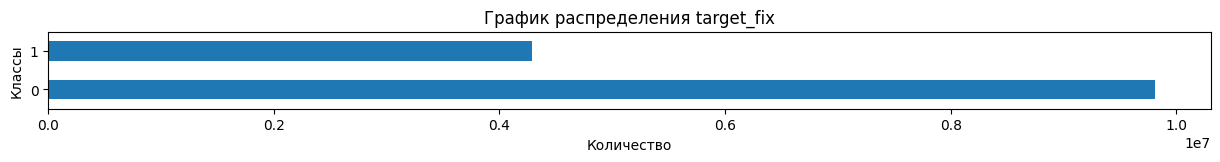

Распределение признака по классам в процентах


0    69.578844
1    30.421156
Name: target_fix, dtype: float64

In [148]:
def_barh(df_merged, 'target_fix', (15, 1))

## Проверка на мультиколлинеарность

In [149]:
df_merged.shape

(14103800, 35)

In [151]:
df_phik = df_merged.sample(n=500_000)

In [152]:
INTERVAL_COLS = []

for col in list(df_phik.columns):
    if len(df_phik[col].unique())>100:
        INTERVAL_COLS.append(col)

INTERVAL_COLS

['order_date',
 'lesson_price',
 'date_update',
 'lesson_cost',
 'rating_for_users',
 'rating_for_admin',
 'display_days',
 'rating_for_users_yesterday']

In [153]:
%%time

corr_table = df_phik.phik_matrix(interval_cols=INTERVAL_COLS)

CPU times: user 7.99 s, sys: 1.8 s, total: 9.79 s
Wall time: 12.4 s


Оценим корреляцию между признаками и выберем наиболее подходящие для обучения моделей.

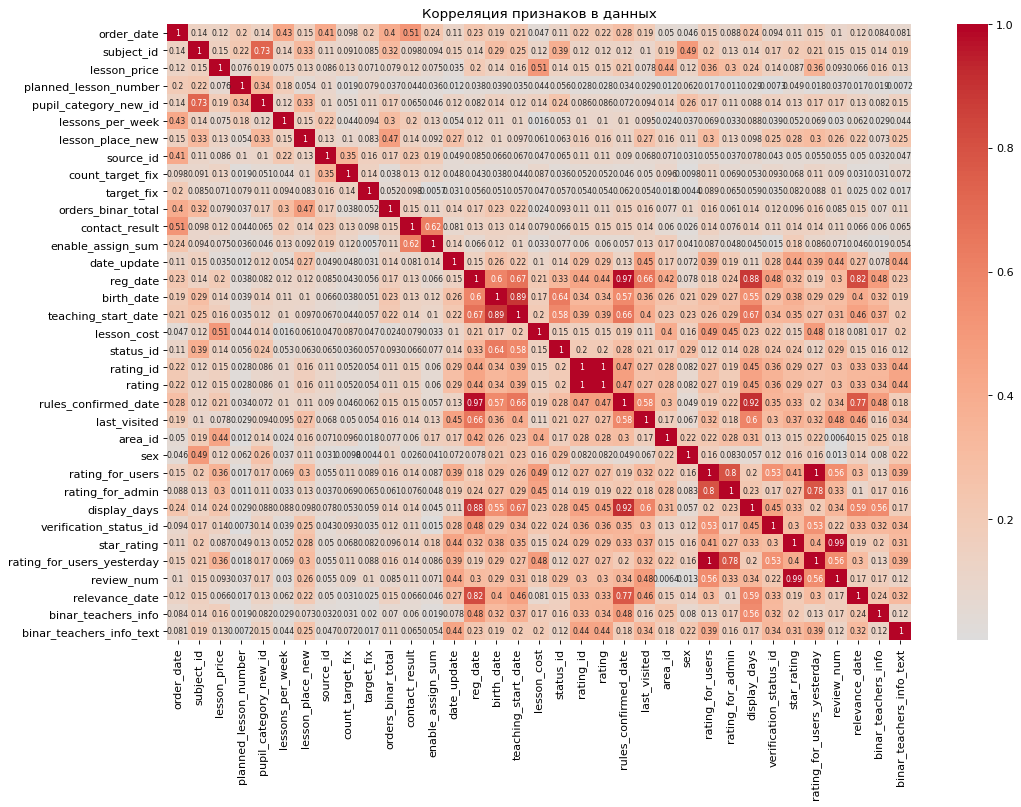

In [154]:
figure(figsize=(15, 10), dpi=80)
sns.heatmap(corr_table, annot=True, annot_kws={"size": 7}, cmap='coolwarm', center=0)
plt.title('Корреляция признаков в данных')
plt.show()

###### Ниже представлены веса признаков при обучении с использованием всех признаков.

Выберем фиальные признаки, исходя из полученной информации.

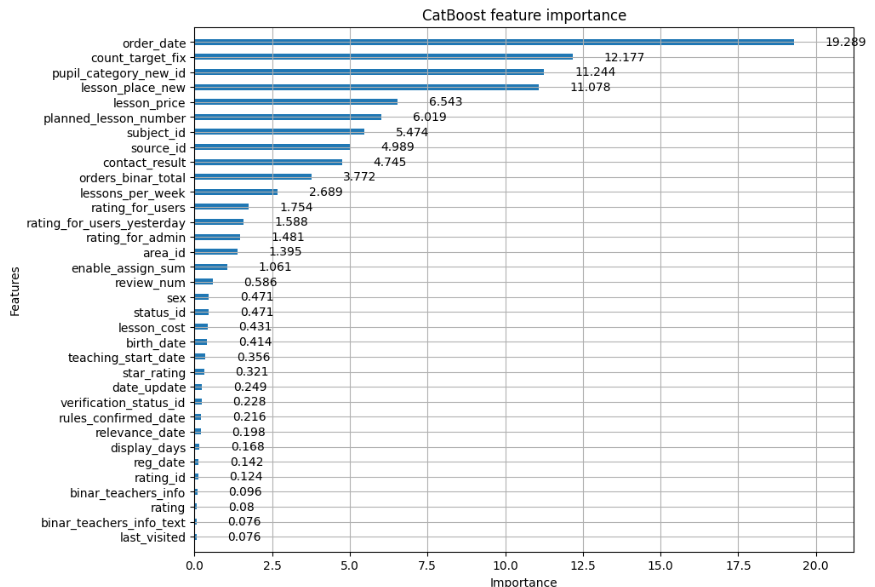

In [155]:
final_cols = ['order_date', 'count_target_fix', 'pupil_category_new_id', 'lesson_place_new',
              'lesson_price', 'planned_lesson_number', 'subject_id', 'source_id', 'contact_result',
              'orders_binar_total', 'lessons_per_week', 'rating_for_users', 'target_fix'
             ]
#, 'rating_for_users_yesterday', 'rating_for_admin', 'area_id', 'enable_assign_sum'

df_final = df_phik[final_cols]

In [156]:
corr_table_final = df_final.phik_matrix(interval_cols=INTERVAL_COLS)

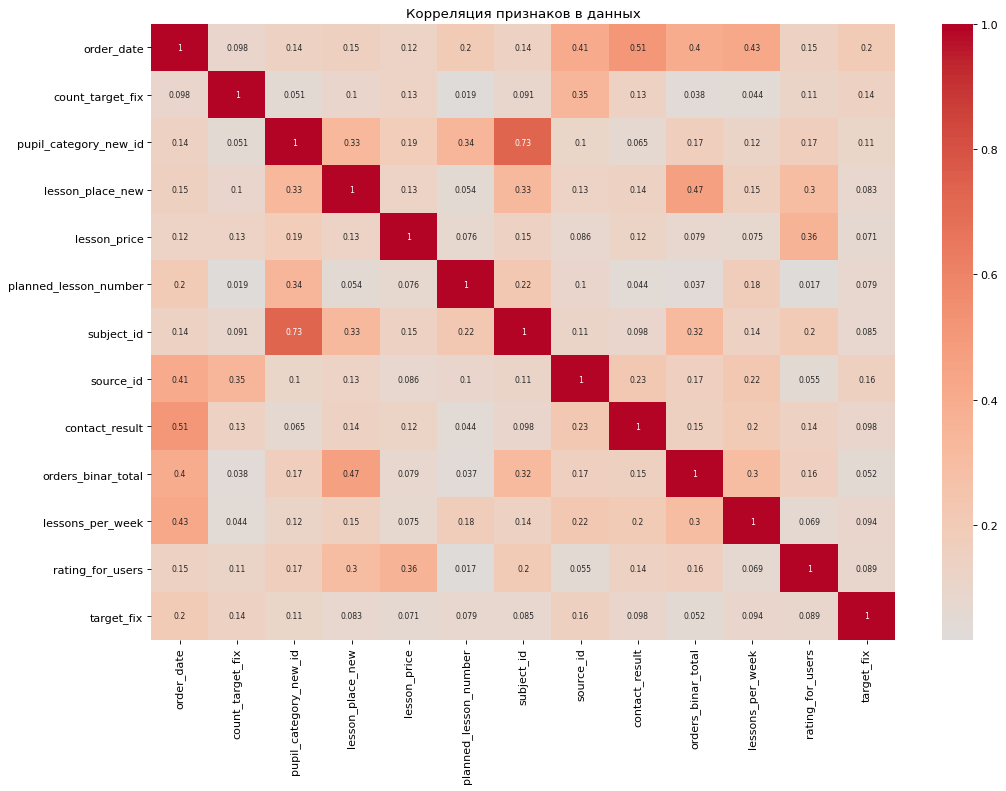

In [157]:
figure(figsize=(15, 10), dpi=80)
sns.heatmap(corr_table_final, annot=True, annot_kws={"size": 7}, cmap='coolwarm', center=0)
plt.title('Корреляция признаков в данных')
plt.show()

In [ ]:
# df_orders_final.columns

In [158]:
# final_cols = ['subject_id',
#        'amount_to_pay', 'pupil_category_new_id',
#        'lesson_place_new', 'source_id',
#        'additional_status_id', 'count_target_fix',
#        'target_fix']

# df_final = df_orders_final[final_cols]
df_final.head(2)

,order_date,count_target_fix,pupil_category_new_id,lesson_place_new,lesson_price,planned_lesson_number,subject_id,source_id,contact_result,orders_binar_total,lessons_per_week,rating_for_users,target_fix
6001427,207,3,14,4,5000,10,7,14,4,1,3,440.0,0
11928874,732,3,1,2,500,10,29,23,1,1,4,228.5,0


## Подготовка данных для обучения

### Разбиение данных

In [159]:
RANDOM_STATE = 42

In [160]:
X = df_final.drop('target_fix', axis=1)
y = df_final['target_fix']

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                    random_state=RANDOM_STATE,
                                                    shuffle=True)

In [162]:
train_sample = X_train.shape[0]/X.shape[0]
test_sample = X_test.shape[0]/X.shape[0]

print('Размер тренировочной выборки- {:.0%}'.format(train_sample))
print('Размер тестовой выборки - {:.0%}'.format(test_sample))

Размер тренировочной выборки- 75%
Размер тестовой выборки - 25%


In [163]:
display(X_train.shape)
display(X_test.shape)

(375000, 12)

(125000, 12)

### Масштабирование и кодирование признаков

Для масштабирования признаков будем использовать ColumnTransformer

<!-- а для упрощения извлечения важностей признаков из моделей поставим `set_output(transform="pandas")` -->

In [164]:
numerics = list(X.select_dtypes(include=['int16', 'int32', 'float16']).columns)
categorical = list(X.select_dtypes(include='object').columns)

In [165]:
%%time
# Удаление предупреждения
pd.options.mode.chained_assignment = None

# Создадим объект структуры и настроим его на обучающих данных
scaler = StandardScaler()
scaler.fit(X_train[numerics])

# Преобразуем обучающую, валидационную и тестовую выборки функцией transform()
X_train[numerics] = scaler.transform(X_train[numerics])
X_test[numerics] = scaler.transform(X_test[numerics])

CPU times: user 625 ms, sys: 124 ms, total: 749 ms
Wall time: 748 ms


In [166]:
X_train.head(2)

,order_date,count_target_fix,pupil_category_new_id,lesson_place_new,lesson_price,planned_lesson_number,subject_id,source_id,contact_result,orders_binar_total,lessons_per_week,rating_for_users
1992416,-0.052698,-0.465536,0.556705,0.11122,0.202759,0.243433,-0.168880,1.106073,-0.433869,-0.662030,-0.479517,0.463374
8021117,-0.927174,-0.465536,0.259657,0.11122,-0.500645,0.243433,-0.016518,-0.729873,0.604234,-1.360848,-0.479517,-0.188538


In [167]:
display(X_train.shape)
display(X_test.shape)

(375000, 12)

(125000, 12)

### Вывод по итогу подготовки данных для обучения

Проведены:

- разбиение данных на выборки в соотношении train/test = 3/1
- масштабирование признаков`


## Обучение и выбор модели

In [168]:
result = []

### KNeighborsClassifier

In [169]:
knn = KNeighborsClassifier()

In [170]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [171]:
%%time

# Выберем параметры для grid search
knn_parametrs = {
    'n_neighbors' : range(100, 101, 10)
}

# Настраиваем grid search
knn_gs = GridSearchCV(knn, knn_parametrs, n_jobs=-1, cv=5, scoring='roc_auc', refit = 'roc_auc')

# Запускаем обучение X_train
knn_gs.fit(X_train, y_train)

CPU times: user 1.39 s, sys: 64.1 ms, total: 1.46 s
Wall time: 7min 23s


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': range(100, 101, 10)}, refit='roc_auc',
             scoring='roc_auc')

In [172]:
knn_cv_scores = pd.DataFrame(knn_gs.cv_results_).sort_values(by='rank_test_score')
result.append(['knn', knn_gs.best_score_])

display(knn_gs.best_params_)
print(f"Оценка на кросс-валидации для лучшего экземпляра модели KNeighborsClassifier: {knn_gs.best_score_}")
knn_cv_scores[['params','split0_test_score', 'split1_test_score', 'split2_test_score',\
       'split3_test_score', 'split4_test_score', 'mean_test_score',\
       'std_test_score', 'rank_test_score']].head(3)

{'n_neighbors': 100}

Оценка на кросс-валидации для лучшего экземпляра модели KNeighborsClassifier: 0.6673712893603636


,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,{'n_neighbors': 100},0.668369,0.662656,0.670673,0.669389,0.665769,0.667371,0.002856,1


### CatBoost

In [173]:
cbc = CatBoostClassifier(loss_function='Logloss')

In [174]:
cbc.get_params().keys()

dict_keys(['loss_function'])

In [175]:
%%time

# Выберем параметры для grid search
cbc_parametrs = {'depth'         : [10],
                 'learning_rate' : [0.01],
                 'iterations'    : [500],
                 'l2_leaf_reg'   : [5]
}

# Настраиваем grid search
cbc_gs = GridSearchCV(cbc, cbc_parametrs, n_jobs=-1, cv=5, scoring='roc_auc', refit = 'roc_auc')

# Запускаем обучение X_train
cbc_gs.fit(X_train, y_train, logging_level='Silent')


# cbc_parametrs = {
#                  'depth'         : [4, 6, 10, 14],
#                  'learning_rate' : [0.001, 0.01, 0.1, 1.0],
#                  'iterations'    : [50, 80, 100, 200, 500. 1000]
#                  'l2_leaf_reg'   : [5]
# }

CPU times: user 2min 15s, sys: 12.9 s, total: 2min 28s
Wall time: 3min 41s


GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x7fd1dce89580>,
             n_jobs=-1,
             param_grid={'depth': [10], 'iterations': [500], 'l2_leaf_reg': [5],
                         'learning_rate': [0.01]},
             refit='roc_auc', scoring='roc_auc')

In [176]:
# Создадим dataframe из cross-validation данных
cbc_cv_scores = pd.DataFrame(cbc_gs.cv_results_).sort_values(by='rank_test_score')
result.append(['CatBoost', cbc_gs.best_score_])

# Отобразим полученные результаты
display(cbc_gs.best_params_)
print(f"Оценка на кросс-валидации для лучшего экземпляра модели CatBoost: {cbc_gs.best_score_}")
cbc_cv_scores[['params','split0_test_score', 'split1_test_score', 'split2_test_score',\
       'split3_test_score', 'split4_test_score', 'mean_test_score',\
       'std_test_score', 'rank_test_score']].head(3)

{'depth': 10, 'iterations': 500, 'l2_leaf_reg': 5, 'learning_rate': 0.01}

Оценка на кросс-валидации для лучшего экземпляра модели CatBoost: 0.6843473759456767


,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,"{'depth': 10, 'iterations': 500, 'l2_leaf_reg'...",0.685308,0.680549,0.687312,0.685442,0.683127,0.684347,0.002316,1


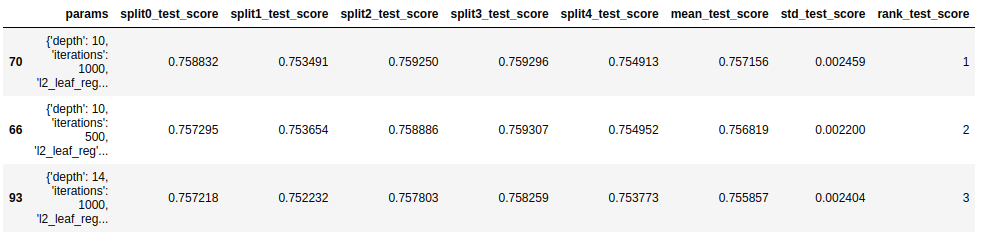

### Вывод по итогу обучения моделей

In [177]:
pd.DataFrame(result, columns=['Модель', 'ROC-AUC']).sort_values(by='ROC-AUC', ascending=False)

,Модель,ROC-AUC
1,CatBoost,0.684347
0,knn,0.667371


Лучшие результаты на кросс-валидации показала модель CatBoost с гиперпараметрами:

`'depth': 10, 'iterations': 1000, 'l2_leaf_reg': 5, 'learning_rate': 0.1`

В дальнейшем будем использовать её.

## Оценка лучшей модели

### Тестирование модели

In [178]:
cbc_y_preds = cbc_gs.predict_proba(X_test)[:, 1]

cbc_roc_auc = roc_auc_score(y_test, cbc_y_preds)
# zero_roc_auc = roc_auc_score(y_test, y_test*0)

print(f"Метрика roc_auc модели `CatBoost` равна: {cbc_roc_auc}")
# print(f"Метрика roc_auc качества предсказания столбца нулей равна: {zero_roc_auc}")
print()
report = classification_report(y_test, cbc_gs.predict(X_test))
print(report)

Метрика roc_auc модели `CatBoost` равна: 0.6855385800314707

              precision    recall  f1-score   support

           0       0.72      0.96      0.82     86777
           1       0.60      0.14      0.23     38223

    accuracy                           0.71    125000
   macro avg       0.66      0.55      0.53    125000
weighted avg       0.68      0.71      0.64    125000



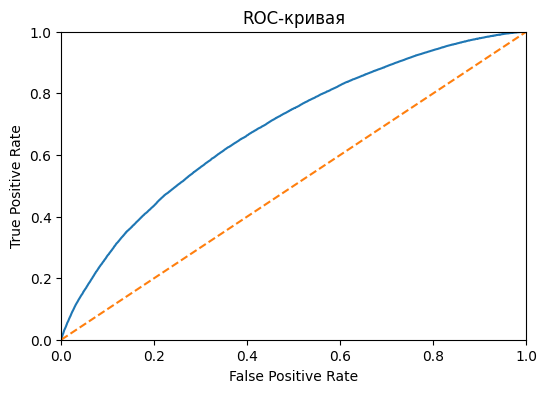

In [179]:
# ROC кривая
fpr, tpr, thresholds = roc_curve(y_test, cbc_y_preds)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')

plt.show()

### Матрица ошибок

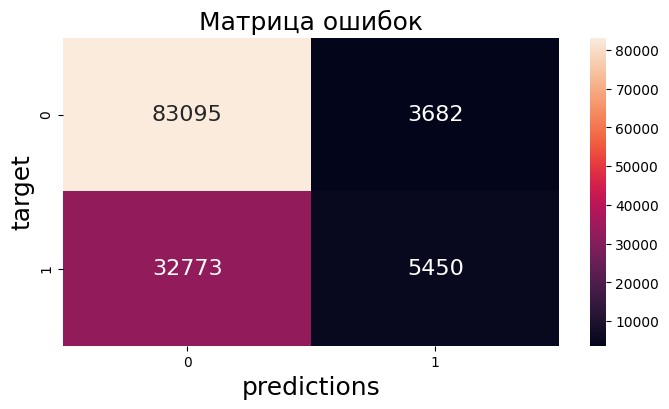

In [180]:
# Матрица ошибок
predictions = cbc_gs.predict(X_test)

cm_cbc = confusion_matrix(y_test, predictions)
cm_cbc_data = pd.DataFrame(cm_cbc,
                           index=['0', '1'],
                           columns=['0', '1'])

plt.figure(figsize=(8, 4))
sns.heatmap(cm_cbc, xticklabels=cm_cbc_data.columns, yticklabels=cm_cbc_data.index,
            annot=True, fmt='g', annot_kws={"size": 16})
plt.title("Матрица ошибок", size=18)
plt.xlabel('predictions', size=18)
plt.ylabel('target', size=18)
plt.show()

In [181]:
print(f"True  Positive :{cm_cbc[0][0]}/{cm_cbc[0][0]/len(y_test==0):.2%}"
      " – количество заказов, правильно отнесенных к 0 классу (не оплачено)")
print(f"False Positive :{cm_cbc[0][1]}/{cm_cbc[0][1]/len(y_test==1):.2%}"
      " – количество заказов, не правильно отнесенных к 0 классу")
print()

print(f"True  Negative :{cm_cbc[1][1]}/{cm_cbc[1][1]/len(y_test==1):.2%}"
      " – количество заказов, правильно отнесенных к 1 классу (оплачено)")
print(f"False Negative :{cm_cbc[1][0]}/{cm_cbc[1][0]/len(y_test==0):.2%}"
      " – количество заказов, не правильно отнесенных к 1 классу")

True  Positive :83095/66.48% – количество заказов, правильно отнесенных к 0 классу (не оплачено)
False Positive :3682/2.95% – количество заказов, не правильно отнесенных к 0 классу

True  Negative :5450/4.36% – количество заказов, правильно отнесенных к 1 классу (оплачено)
False Negative :32773/26.22% – количество заказов, не правильно отнесенных к 1 классу


### Оценка важности признаков

In [182]:
# Функция отображения важности признаков модели
def plot_feature_importance(feature_names, feature_scores, top_feats=20, title='Importance', x_label='Importance', 
                            y_label='Features'):
    tuples = [(name, round(score, 3)) for name, score in zip(feature_names, feature_scores)]
    tuples = sorted(tuples, key=lambda x: x[1])[-top_feats:]
    
    labels, values = zip(*tuples)
    _, ax = plt.subplots(1, 1, figsize=(10, 8))
    ylocs = np.arange(len(values))
    
    ax.barh(ylocs, values, align='center', height=0.4)
    for x, y in zip(values, ylocs):
        ax.text(x + 1, y, x, va='center')
        
    ax.set_yticks(ylocs)
    ax.set_yticklabels(labels)
    xlim = (0, max(values) * 1.1)
    ax.set_xlim(xlim)
    ylim = (-1, len(values))
    ax.set_ylim(ylim)
    
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.grid(True)

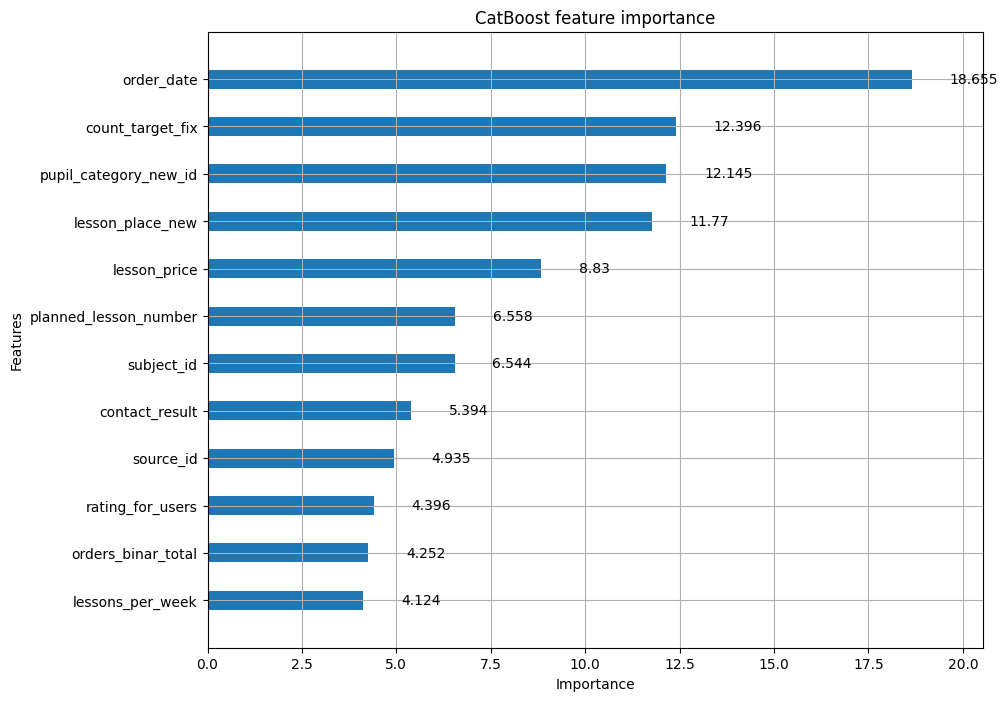

In [183]:
importances = cbc_gs.best_estimator_.feature_importances_
plot_feature_importance(X_train, importances, top_feats=X_train.shape[1], title='CatBoost feature importance', 
                        x_label='Importance')

## Итоговый вывод

Метрика roc_auc модели `CatBoost` равна: 0.684347

Модель считает наиболее важными признаком - общее количество дублей заявки, сумму бинарных признаков из таблицы заказов

###### Количество от общего объема заявок, которое мы можем не обрабатывать, так как они не будут оплачены:

- True  Positive - 66.48% – количество заказов, правильно отнесенных к 0 классу (не оплачено)

---

###### Топ заявок, которым нужно отдать максимальный приоритет:
- False Negative - 26.22% – количество заказов, не правильно отнесенных к 1 классу (потенциально могут быть оплачены)
---

###### Имеет значения precision, ко которым толерантен заказчик
- `0` - 0.72 (precision неоплаченных заявок)
- `1` - 0.6
---

### Возможные улучшения проекта

Дополнительное присоединение таблицы `suitable_teachers`. Однако, у меня не получилось извлечь из нее значительной выгоды при сохранении трудозатрат.

Другие вариации признаков итоговой модели

Использование ансамблей.